# Beta-diversity shipping 16S

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis'

In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


start with ASVs

In [4]:
import qiime2
from skbio.stats.distance import permanova, DistanceMatrix

#load distance matrices for LP5 (both the non-merged and merged tables):
#jaccard:
jaccard_dm_16S_ASV = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction/core-metrics-results-380/filtered_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_ASV = jaccard_dm_16S_ASV.view(DistanceMatrix)

jaccard_dm_16S_ASV_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_ASV_merged = jaccard_dm_16S_ASV_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_ASV = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction/core-metrics-results-380/filtered_table_braycurtis_distance_matrix.qza')
bray_dm_16S_ASV = bray_dm_16S_ASV.view(DistanceMatrix)

bray_dm_16S_ASV_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_table_braycurtis_distance_matrix.qza')
bray_dm_16S_ASV_merged = bray_dm_16S_ASV_merged.view(DistanceMatrix)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/core/cache.py:468: UserWarning: Your temporary cache was found to be in an inconsistent state. It has been recreated.
  warnings.warn(


OTUs

In [5]:
jaccard_dm_16S_OTU = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/filtered_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_OTU = jaccard_dm_16S_OTU.view(DistanceMatrix)

jaccard_dm_16S_OTU_merged = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_OTU_merged = jaccard_dm_16S_OTU_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_OTU = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/filtered_table_braycurtis_distance_matrix.qza')
bray_dm_16S_OTU = bray_dm_16S_OTU.view(DistanceMatrix)

bray_dm_16S_OTU_merged = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_table_braycurtis_distance_matrix.qza')
bray_dm_16S_OTU_merged = bray_dm_16S_OTU_merged.view(DistanceMatrix)

kmers - no tfidf

In [6]:

jaccard_dm_16S_k = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380/filtered_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_k = jaccard_dm_16S_k.view(DistanceMatrix)

jaccard_dm_16S_k_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/merged_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_k_merged = jaccard_dm_16S_k_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_k = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380/filtered_table_braycurtis_distance_matrix.qza')
bray_dm_16S_k = bray_dm_16S_k.view(DistanceMatrix)

bray_dm_16S_k_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/merged_table_braycurtis_distance_matrix.qza')
bray_dm_16S_k_merged = bray_dm_16S_k_merged.view(DistanceMatrix)

kmers - with tfidf

In [7]:

jaccard_dm_16S_kt = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-tfidf/filtered_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_kt = jaccard_dm_16S_kt.view(DistanceMatrix)

jaccard_dm_16S_kt_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-tfidf-merged/merged_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_kt_merged = jaccard_dm_16S_kt_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_kt = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-tfidf/filtered_table_braycurtis_distance_matrix.qza')
bray_dm_16S_kt = bray_dm_16S_kt.view(DistanceMatrix)

bray_dm_16S_kt_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-tfidf-merged/merged_table_braycurtis_distance_matrix.qza')
bray_dm_16S_kt_merged = bray_dm_16S_kt_merged.view(DistanceMatrix)

In [8]:
from skbio.stats.ordination import pcoa

dms = {
    'jaccard_dm_16S_ASV': jaccard_dm_16S_ASV,
    'jaccard_dm_16S_ASV_merged': jaccard_dm_16S_ASV_merged,
    'bray_dm_16S_ASV ': bray_dm_16S_ASV ,
    'bray_dm_16S_ASV_merged': bray_dm_16S_ASV_merged,
    'jaccard_dm_16S_OTU': jaccard_dm_16S_OTU,
    'jaccard_dm_16S_OTU_merged': jaccard_dm_16S_OTU_merged,
    'bray_dm_16S_OTU': bray_dm_16S_OTU,
    'bray_dm_16S_OTU_merged': bray_dm_16S_OTU_merged,
    'jaccard_dm_16S_k': jaccard_dm_16S_k,
    'jaccard_dm_16S_k_merged': jaccard_dm_16S_k_merged,
    'bray_dm_16S_k': bray_dm_16S_k,
    'bray_dm_16S_k_merged': bray_dm_16S_k_merged,
    'jaccard_dm_16S_kt': jaccard_dm_16S_kt,
    'jaccard_dm_16S_kt_merged': jaccard_dm_16S_kt_merged,
    'bray_dm_16S_kt': bray_dm_16S_kt,
    'bray_dm_16S_kt_merged': bray_dm_16S_kt_merged
    

    }

then, calculate pcoas

In [9]:
import pandas as pd
from skbio.stats.ordination import pcoa



# Function to compute PCoA
def compute_pcoa(distance_matrix, n_components=2):
    """Performs PCoA on a distance matrix and returns coordinates + variance explained."""
    # Run PCoA
    pcoa_res = pcoa(distance_matrix)
    
    # Extract transformed coordinates
    coordinates = pd.DataFrame(
        pcoa_res.samples.iloc[:, :n_components].values,  # Get first n PCoA components
        index=distance_matrix.ids,  # Keep original sample names
        columns=[f"PCo{i+1}" for i in range(n_components)]  # Rename components
    )
    
    # Extract variance explained (proportion of total variance per component)
    variance_explained = pcoa_res.proportion_explained.values[:n_components]

    return coordinates, variance_explained

In [10]:
pcoa_jaccard_ASV, variance_jaccard_ASV = compute_pcoa(jaccard_dm_16S_ASV)
pcoa_bray_curtis_ASV, variance_bray_curtis_ASV = compute_pcoa(bray_dm_16S_ASV)
pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged = compute_pcoa(jaccard_dm_16S_ASV_merged)
pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged = compute_pcoa(bray_dm_16S_ASV_merged)

pcoa_jaccard_OTU, variance_jaccard_OTU = compute_pcoa(jaccard_dm_16S_OTU)
pcoa_bray_curtis_OTU, variance_bray_curtis_OTU = compute_pcoa(bray_dm_16S_OTU)
pcoa_jaccard_OTU_merged, variance_jaccard_OTU_merged = compute_pcoa(jaccard_dm_16S_OTU_merged)
pcoa_bray_curtis_OTU_merged, variance_bray_curtis_OTU_merged = compute_pcoa(bray_dm_16S_OTU_merged)

pcoa_jaccard_k, variance_jaccard_k = compute_pcoa(jaccard_dm_16S_k)
pcoa_bray_curtis_k, variance_bray_curtis_k = compute_pcoa(bray_dm_16S_k)
pcoa_jaccard_k_merged, variance_jaccard_k_merged = compute_pcoa(jaccard_dm_16S_k_merged)
pcoa_bray_curtis_k_merged, variance_bray_curtis_k_merged = compute_pcoa(bray_dm_16S_k_merged)

pcoa_jaccard_kt, variance_jaccard_kt = compute_pcoa(jaccard_dm_16S_kt)
pcoa_bray_curtis_kt, variance_bray_curtis_kt = compute_pcoa(bray_dm_16S_kt)
pcoa_jaccard_kt_merged, variance_jaccard_kt_merged = compute_pcoa(jaccard_dm_16S_kt_merged)
pcoa_bray_curtis_kt_merged, variance_bray_curtis_kt_merged = compute_pcoa(bray_dm_16S_kt_merged)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.35570205664356175 and the largest is 2.0368022554184453.
  warn(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be usefu

In [11]:
#import this .json file cud_temperature_time_gradient_palette.json in 16S/:


# Load the JSON file
import json
with open('16S/cud_temperature_time_gradient_palette.json', 'r') as f:
    gradient_palette = json.load(f)

In [12]:
gradient_palette

{'17°C (Bluish Green)': {'1': '#003f2e',
  '2': '#004935',
  '3': '#00523c',
  '4': '#005c43',
  '5': '#00654a',
  '6': '#006f50',
  '7': '#007857',
  '10': '#00825e',
  '14': '#008b65',
  '21': '#00956c',
  '28': '#009e73'},
 '30°C (Orange)': {'1': '#5c4000',
  '2': '#6a4900',
  '3': '#785300',
  '4': '#855c00',
  '5': '#936600',
  '6': '#a16f00',
  '7': '#af7900',
  '10': '#bd8200',
  '14': '#ca8c00',
  '21': '#d89500',
  '28': '#e69f00'},
 '4°C (Sky Blue)': {'1': '#22485d',
  '2': '#28536b',
  '3': '#2d5e79',
  '4': '#326887',
  '5': '#377395',
  '6': '#3c7ea3',
  '7': '#4189b1',
  '10': '#4794bf',
  '14': '#4c9ecd',
  '21': '#51a9db',
  '28': '#56b4e9'}}

In [9]:
#import sample metadata called shipping_general_metadata_all_samples.tsv as a dataframe, index is col 'SampleID'
#import this 20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv:

shipping_general_metadata_all_samples = pd.read_csv('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv', sep=',', index_col=0)

shipping_general_metadata_all_samples



Chao1 kmers  Chao1 OTUs  Chao1 ASVs  identifier row  \
366294_121-LP4-16S-0621   244.000000         1.0         1.0   W30.02.28   E   
366294_147-LP4-16S-0647   244.000000         1.0         1.0   W30.01.28   G   
366294_142-LP4-16S-0642   244.000000         2.0         1.0   W17.03.28   B   
366294_175-LP4-16S-0675   361.000000         5.0         2.0   W17.03.01   C   
366294_200-LP4-16S-0700   366.344828         1.0         2.0  W17.01.01    D   
...                              ...         ...         ...         ...  ..   
366294_211-LP4-16S-0711   728.000000         5.0         7.0  W30.01.01    G   
366294_132-LP4-16S-0632   728.000000         5.0         7.0   W04.01.28   H   
366294_224-LP4-16S-0724   728.000000         5.0         7.0   W17.03.14   D   
366294_186-LP4-16S-0686   734.000000         5.0        11.0   W17.02.05   F   
xxx                              NaN         NaN         NaN   W04.03.28   F   

                         column  temperature  day  replicate well  ...  \
366294_121-LP4-16S-0621       6           30   28          2  E06  ...   
366294_147-LP4-16S-0647       9           30   28          1  G09  ...   
366294_142-LP4-16S-0642       9           17   28          3  B09  ...   
366294_175-LP4-16S-0675       1           17    1          3  C01  ...   
366294_200-LP4-16S-0700       4           17    1          1  D04  ...   
...                         ...          ...  ...        ...  ...  ...   
366294_211-LP4-16S-0711       5           30    1          1  G05  ...   
366294_132-LP4-16S-0632       7            4   28          1  H07  ...   
366294_224-LP4-16S-0724       7           17   14          3  D07  ...   
366294_186-LP4-16S-0686       2           17    5          2  F02  ...   
xxx                           9            4   28          3  F09  ...   

                         Evenness ASVs  Simpson ASVs  Shannon OTUs  \
366294_121-LP4-16S-0621       0.000000      0.000000      0.000000   
366294_147-LP4-16S-0647       0.000000      0.000000      0.000000   
366294_142-LP4-16S-0642       0.000000      0.000000      0.995727   
366294_175-LP4-16S-0675       0.066634      0.015706      0.136859   
366294_200-LP4-16S-0700       0.027267      0.005464      0.000000   
...                                ...           ...           ...   
366294_211-LP4-16S-0711       0.323106      0.269474      0.611716   
366294_132-LP4-16S-0632       0.470056      0.444598      1.023748   
366294_224-LP4-16S-0724       0.519479      0.565799      1.441522   
366294_186-LP4-16S-0686       0.349573      0.420970      0.936512   
xxx                                NaN           NaN           NaN   

                         Evenness OTUs  Simpson OTUs  Shannon kmers  \
366294_121-LP4-16S-0621       0.000000      0.000000       7.918076   
366294_147-LP4-16S-0647       0.000000      0.000000       7.918076   
366294_142-LP4-16S-0642       0.995727      0.497041       7.918076   
366294_175-LP4-16S-0675       0.068430      0.031205       7.952775   
366294_200-LP4-16S-0700       0.000000      0.000000       7.926608   
...                                ...           ...            ...   
366294_211-LP4-16S-0711       0.263452      0.177119       8.411517   
366294_132-LP4-16S-0632       0.440904      0.353560       8.665579   
366294_224-LP4-16S-0724       0.620830      0.574820       9.019031   
366294_186-LP4-16S-0686       0.403334      0.393186       8.850571   
xxx                                NaN           NaN            NaN   

                         Evenness kmers  Simpson kmers    color   color2  
366294_121-LP4-16S-0621        0.998404       0.995840  #751c6d  #751c6d  
366294_147-LP4-16S-0647        0.998404       0.995840  #751c6d  #751c6d  
366294_142-LP4-16S-0642        0.998404       0.995840  #fdc067  #fdc067  
366294_175-LP4-16S-0675        0.936077       0.995825  #332615  #fdc067  
366294_200-LP4-16S-0700        0.932997       0.995792  #332615  #fdc067  
...                            

In [12]:
from matplotlib.colors import to_rgb, to_hex
import numpy as np

# Define base colors (lightest) for each temperature
# base_colors = {
#     '4°C (Sky Blue)': '#56b4e9',
#     '17°C (Bluish Green)': '#009e73',
#     '30°C (Orange)': '#e69f00'
# }
base_colors = {
    '4°C (Sky Blue)': '#9EC8FFFF',
    '17°C (Bluish Green)': '#FDC067FF',
    '30°C (Orange)': '#751C6DFF'
}



# Define the time points
time_points = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']
n_points = len(time_points)

# Create darker-to-lighter gradients
gradient_palette_adjusted = {}

for label, hex_color in base_colors.items():
    base_rgb = np.array(to_rgb(hex_color))
    gradient = {}
    for i, tp in enumerate(time_points):
        factor = 0.2 + 0.8 * (i / (n_points - 1))  # Linear scale from dark (0.4) to original (1.0)
        adjusted_rgb = tuple(base_rgb * factor)
        gradient[tp] = to_hex(adjusted_rgb)
    gradient_palette_adjusted[label] = gradient

gradient_palette_adjusted


{'4°C (Sky Blue)': {'1': '#202833',
  '2': '#2c3847',
  '3': '#39485c',
  '4': '#465870',
  '5': '#526885',
  '6': '#5f7899',
  '7': '#6b88ad',
  '10': '#7898c2',
  '14': '#85a8d6',
  '21': '#91b8eb',
  '28': '#9ec8ff'},
 '17°C (Bluish Green)': {'1': '#332615',
  '2': '#47361d',
  '3': '#5b4525',
  '4': '#6f542d',
  '5': '#846436',
  '6': '#98733e',
  '7': '#ac8346',
  '10': '#c0924e',
  '14': '#d5a157',
  '21': '#e9b15f',
  '28': '#fdc067'},
 '30°C (Orange)': {'1': '#170616',
  '2': '#21081f',
  '3': '#2a0a27',
  '4': '#330c30',
  '5': '#3d0f39',
  '6': '#461141',
  '7': '#50134a',
  '10': '#591553',
  '14': '#62185c',
  '21': '#6c1a64',
  '28': '#751c6d'}}

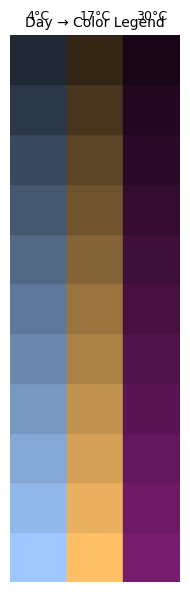

In [15]:
# Rebuild the gradient palette dictionary manually since the file is missing

# gradient_palette = {
#     '4°C (Sky Blue)': {
#         '1': '#22485d', '2': '#28536b', '3': '#2d5e79', '4': '#326887', '5': '#377395',
#         '6': '#3c7ea3', '7': '#4189b1', '10': '#4794bf', '14': '#4c9ecd', '21': '#51a9db', '28': '#56b4e9'
#     },
#     '17°C (Bluish Green)': {
#         '1': '#003f2e', '2': '#004935', '3': '#00523c', '4': '#005c43', '5': '#00654a',
#         '6': '#006f50', '7': '#007857', '10': '#00825e', '14': '#008b65', '21': '#00956c', '28': '#009e73'
#     },
#     '30°C (Orange)': {
#         '1': '#5c4000', '2': '#6a4900', '3': '#785300', '4': '#855c00', '5': '#936600',
#         '6': '#a16f00', '7': '#af7900', '10': '#bd8200', '14': '#ca8c00', '21': '#d89500', '28': '#e69f00'
#     }
# }
# gradient_palette = gradient_palette_adjusted.copy()


# # Use previously defined metadata generation and plotting
# # Define temperature groups and days
# temps = ['4°C (Sky Blue)', '17°C (Bluish Green)', '30°C (Orange)']
# days_ordered = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']



# metadata = shipping_general_metadata_all_samples.copy()

# # Map numerical temperature strings to gradient_palette keys
# temp_key_map = {
#     '4': '4°C (Sky Blue)',
#     '17': '17°C (Bluish Green)',
#     '30': '30°C (Orange)'
# }


# # Assign color
# def map_color(row):
#     day = str(row['day'])
#     temp_raw = str(row['temperature'])
    
#     if row.get('control', False) or temp_raw == '20' or day == '0':
#         return '#000000'  # Black for control

#     temp = temp_key_map.get(temp_raw)
#     if temp and day in gradient_palette[temp]:
#         return gradient_palette[temp][day]
    
#     return '#BBBBBB'  # Fallback


# metadata['color'] = metadata.apply(map_color, axis=1)

# # Create a legend for the color gradients
# fig_leg, ax_leg = plt.subplots(figsize=(2, 6))

# # Plot vertical gradients for each temperature
# for col, temp in enumerate(temps):
#     for row, day in enumerate(reversed(days_ordered)):
#         color = gradient_palette[temp][day]
#         ax_leg.add_patch(plt.Rectangle((col, row), 1, 1, color=color))
#     ax_leg.text(col + 0.5, len(days_ordered) + 0.3, temp.split()[0], ha='center', fontsize=9)

# ax_leg.set_xlim(0, 3)
# ax_leg.set_ylim(0, len(days_ordered))
# ax_leg.set_xticks([])
# ax_leg.set_yticks([])
# ax_leg.set_title("Day → Color Legend", fontsize=10)
# ax_leg.axis('off')

# plt.tight_layout()
# plt.show()


In [16]:
# #make a new color column where all colors are the same per temperature (the brightes of the previous colors, except for 20 degrees it is black):
# # Define the new color mapping
# def map_color_fixed(row):
#     temp_raw = str(row['temperature'])
    
#     if row.get('control', False) or temp_raw == '20' or row['day'] == '0':
#         return '#000000'  # Black for control

#     temp = temp_key_map.get(temp_raw)
#     if temp:
#         return gradient_palette[temp]['28']  # Use the color for day 28
    
#     return '#BBBBBB'  # Fallback

In [17]:
# metadata['color2'] = metadata.apply(map_color_fixed, axis=1)

In [14]:
metadata = shipping_general_metadata_all_samples.copy()

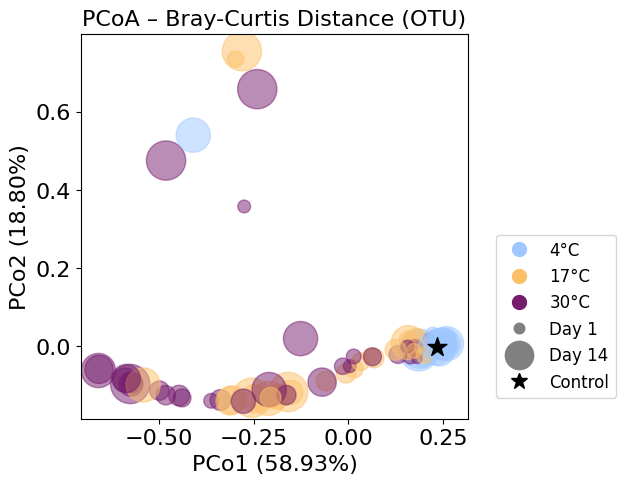

In [19]:
import matplotlib.lines as mlines

def plot_pcoa_with_metadata(pcoa_coords, variance, metadata, title):
    """Plot PCo1 vs. PCo2 with sample colors and dot sizes based on day, with legends."""
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Join coords and metadata by sample index
    merged = pcoa_coords.join(metadata[['color2', 'day', 'temperature']], how='inner')
    
    # Determine sizes
    size_min, size_max = 30, 800
    min_day, max_day = merged['day'].min(), merged['day'].max()
    sizes = size_min + (merged['day'] - min_day) / (max_day - min_day) * (size_max - size_min)
    
    # Separate control from rest
    is_control = merged['day'] == 0
    merged_control = merged[is_control]
    merged_non_control = merged[~is_control]
    
    # Plot non-control samples first
    ax.scatter(
        merged_non_control['PCo1'], merged_non_control['PCo2'],
        c=merged_non_control['color2'], s=sizes[~is_control],
        edgecolor=None, alpha=0.5, label='Samples'
    )
    
    # Plot control sample(s) on top
    ax.scatter(
        merged_control['PCo1'], merged_control['PCo2'],
        c='#000000', s=200, edgecolor=None, marker='*', label='Control'
    )
    
    # Axis labels and title
    ax.set_xlabel(f'PCo1 ({variance[0]*100:.2f}%)', fontsize=16)
    ax.set_ylabel(f'PCo2 ({variance[1]*100:.2f}%)', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_title(title, fontsize=16)
    ax.grid(False)
    

    #240E31FF, #CB6BCEFF, #468892FF, #74F3D3FF, #751C6DFF, #FDC067FF, #AC9ECEFF, #6EC5ABFF
    # Color legend (temperature groups)
    temp_colors = {
        '4': '#9EC8FFFF',
        '17': '#FDC067FF',
        '30': '#751C6DFF'
    }
    color_handles = [
        mlines.Line2D([], [], color=c, marker='o', linestyle='None', markersize=10, label=f'{t}°C')
        for t, c in temp_colors.items()
    ]
    
    # Size legend (example days)
   
    size_legend_days = [1, 14]
    size_handles = [
        mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                      markersize=(size_min + (d - min_day) / (max_day - min_day) * (size_max - size_min))**0.5,
                      label=f'Day {d}')
        for d in size_legend_days
    ]
    
    # Control legend handle
    control_handle = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                                   markersize=12, label='Control')

    # Add legend
    ax.legend(handles=color_handles + size_handles + [control_handle],
              loc='best', title='', frameon=True,bbox_to_anchor=(1.05, 0.5), fontsize=12, title_fontsize=12)

    return fig, ax

plot_pcoa_with_metadata(
    pcoa_bray_curtis_OTU_merged,
    variance_bray_curtis_OTU_merged,
    metadata,
    title="PCoA – Bray-Curtis Distance (OTU)"
)
plt.show()


loop through all distance matrices and metrics/combinations:

In [16]:
pcoa_sets = [
    ("PCoA – Jaccard Distance (ASV)", pcoa_jaccard_ASV, variance_jaccard_ASV),
    ("PCoA – Bray-Curtis Distance (ASV)", pcoa_bray_curtis_ASV, variance_bray_curtis_ASV),
    ("PCoA – Jaccard Distance (ASV merged)", pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged),
    ("PCoA – Bray-Curtis Distance (ASV merged)", pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged),

    ("PCoA – Jaccard Distance (OTU)", pcoa_jaccard_OTU, variance_jaccard_OTU),
    ("PCoA – Bray-Curtis Distance (OTU)", pcoa_bray_curtis_OTU, variance_bray_curtis_OTU),
    ("PCoA – Jaccard Distance (OTU merged)", pcoa_jaccard_OTU_merged, variance_jaccard_OTU_merged),
    ("PCoA – Bray-Curtis Distance (OTU merged)", pcoa_bray_curtis_OTU_merged, variance_bray_curtis_OTU_merged),

    ("PCoA – Jaccard Distance (k-mers)", pcoa_jaccard_k, variance_jaccard_k),
    ("PCoA – Bray-Curtis Distance (k-mers)", pcoa_bray_curtis_k, variance_bray_curtis_k),
    ("PCoA – Jaccard Distance (k-mers merged)", pcoa_jaccard_k_merged, variance_jaccard_k_merged),
    ("PCoA – Bray-Curtis Distance (k-mers merged)", pcoa_bray_curtis_k_merged, variance_bray_curtis_k_merged),

    ("PCoA – Jaccard Distance (k-mers tfidf)", pcoa_jaccard_kt, variance_jaccard_kt),
    ("PCoA – Bray-Curtis Distance (k-mers tfidf)", pcoa_bray_curtis_kt, variance_bray_curtis_kt),
    ("PCoA – Jaccard Distance (k-mers tfidf merged)", pcoa_jaccard_kt_merged, variance_jaccard_kt_merged),
    ("PCoA – Bray-Curtis Distance (k-mers tfidf merged)", pcoa_bray_curtis_kt_merged, variance_bray_curtis_kt_merged),
]


set with non-merged ones

In [17]:
pcoa_sets = [
    ("PCoA – Jaccard Distance (ASV)", pcoa_jaccard_ASV, variance_jaccard_ASV),
    ("PCoA – Bray-Curtis Distance (ASV)", pcoa_bray_curtis_ASV, variance_bray_curtis_ASV),
    # ("PCoA – Jaccard Distance (ASV merged)", pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged),
    # ("PCoA – Bray-Curtis Distance (ASV merged)", pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged),

    ("PCoA – Jaccard Distance (OTU)", pcoa_jaccard_OTU, variance_jaccard_OTU),
    ("PCoA – Bray-Curtis Distance (OTU)", pcoa_bray_curtis_OTU, variance_bray_curtis_OTU),
    # ("PCoA – Jaccard Distance (OTU merged)", pcoa_jaccard_OTU_merged, variance_jaccard_OTU_merged),
    # ("PCoA – Bray-Curtis Distance (OTU merged)", pcoa_bray_curtis_OTU_merged, variance_bray_curtis_OTU_merged),

    ("PCoA – Jaccard Distance (k-mers)", pcoa_jaccard_k, variance_jaccard_k),
    ("PCoA – Bray-Curtis Distance (k-mers)", pcoa_bray_curtis_k, variance_bray_curtis_k),
    # ("PCoA – Jaccard Distance (k-mers merged)", pcoa_jaccard_k_merged, variance_jaccard_k_merged),
    # ("PCoA – Bray-Curtis Distance (k-mers merged)", pcoa_bray_curtis_k_merged, variance_bray_curtis_k_merged),

    ("PCoA – Jaccard Distance (k-mers tfidf)", pcoa_jaccard_kt, variance_jaccard_kt),
    ("PCoA – Bray-Curtis Distance (k-mers tfidf)", pcoa_bray_curtis_kt, variance_bray_curtis_kt),
    # ("PCoA – Jaccard Distance (k-mers tfidf merged)", pcoa_jaccard_kt_merged, variance_jaccard_kt_merged),
    # ("PCoA – Bray-Curtis Distance (k-mers tfidf merged)", pcoa_bray_curtis_kt_merged, variance_bray_curtis_kt_merged),
]

In [50]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

loop through all of them and export to pdf

In [21]:
import os

# Create output directory if it doesn't exist
output_dir = "Figures/pcoa_all_16S"
os.makedirs(output_dir, exist_ok=True)

for title, pcoa_coords, variance in pcoa_sets:
    fig, ax = plot_pcoa_with_metadata(
        pcoa_coords,
        variance,
        metadata,
        title=title
    )

    # Define filename: clean title of special characters
    filename = f"{title.replace(' ', '_').replace('(', '').replace(')', '').replace('–', '-')}16S.pdf"
    filepath = os.path.join(output_dir, filename)

    # Save figure
    fig.savefig(filepath, format='pdf', bbox_inches='tight')
    plt.close(fig)  # Close after saving to avoid inline display


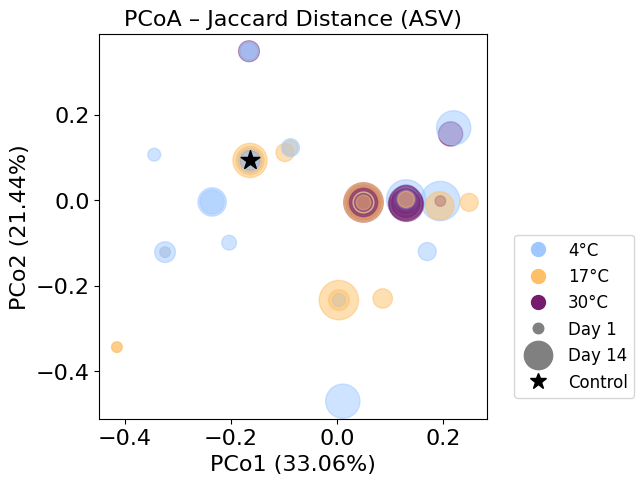

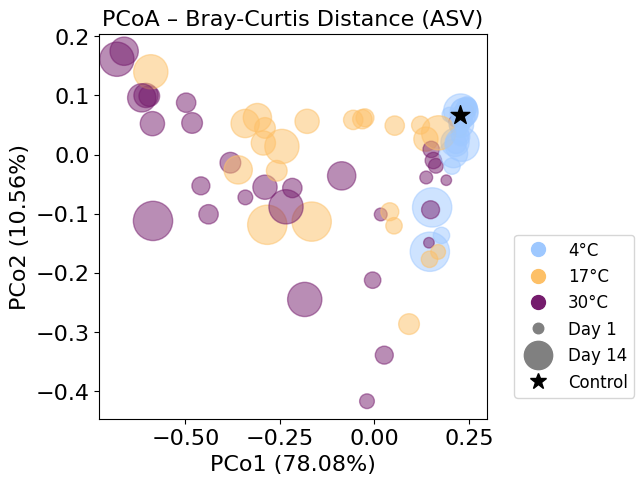

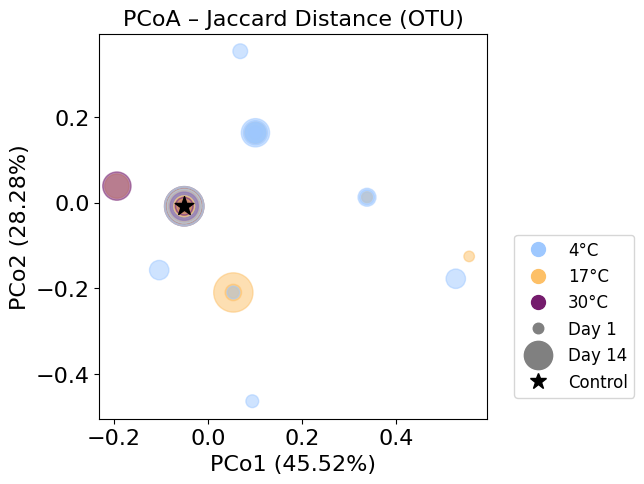

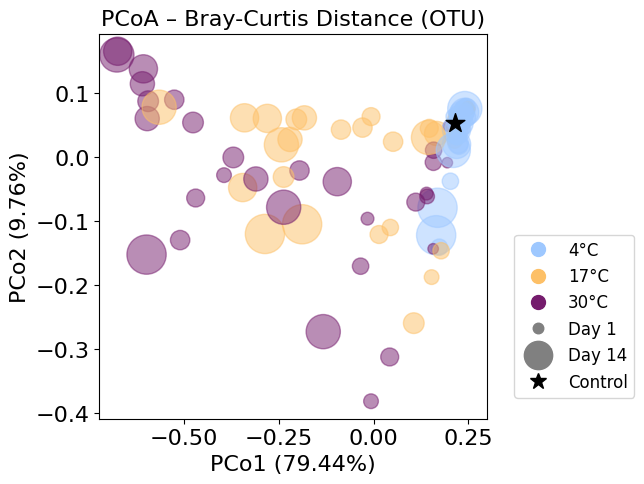

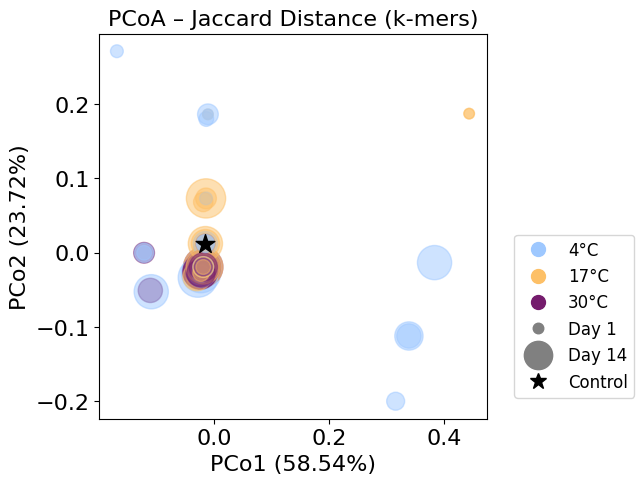

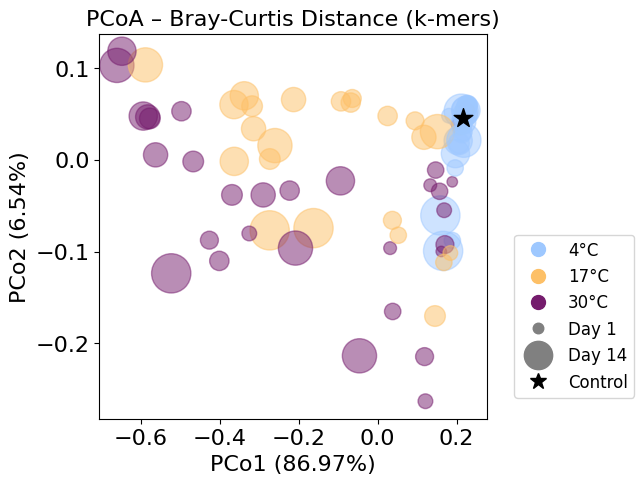

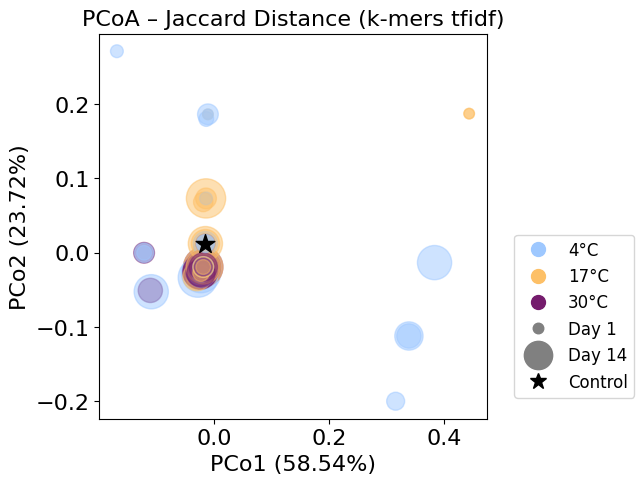

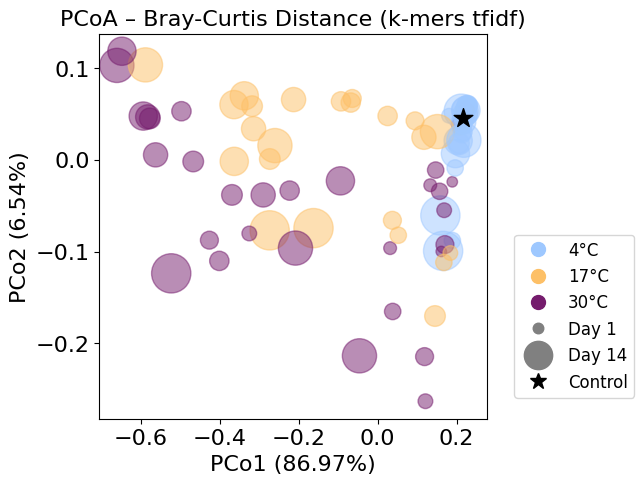

In [20]:
for title, pcoa_coords, variance in pcoa_sets:
    fig, ax = plot_pcoa_with_metadata(
        pcoa_coords,
        variance,
        metadata,
        title=title
    )
    plt.show()


then check out single temperatures:

In [42]:
import matplotlib.lines as mlines
import matplotlib.patches as patches
import numpy as np
from scipy.stats import chi2

def plot_pcoa_for_temperature(pcoa_coords, variance, metadata, temperature_filter, title):
    """Plot PCoA for one temperature with ellipses around each day group."""
    fig, ax = plt.subplots(figsize=(6.5, 6.5))
    
    # Filter metadata to a single temperature
    meta_filtered = metadata[metadata['temperature'].astype(str) == str(temperature_filter)].copy()
    merged = pcoa_coords.join(meta_filtered[['color2', 'day']], how='inner')
    
    # Determine sizes
    size_min, size_max = 30, 800
    min_day, max_day = merged['day'].min(), merged['day'].max()
    merged['size'] = size_min + (merged['day'] - min_day) / (max_day - min_day) * (size_max - size_min)
    
    # Plot samples
    ax.scatter(
        merged['PCo1'], merged['PCo2'],
        c=merged['color2'], s=merged['size'],
        edgecolor=None, alpha=0.7
    )

    # Add ellipses per day group
    for day, group in merged.groupby('day'):
        if group.shape[0] < 2:
            continue  # skip singleton points
        
        coords = group[['PCo1', 'PCo2']].values
        cov = np.cov(coords.T)
        if cov.shape != (2, 2) or np.linalg.matrix_rank(cov) < 2:
            continue  # skip degenerate cases
        
        mean = coords.mean(axis=0)
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]

        # Chi-squared 95% confidence level for 2D
        width, height = 2 * np.sqrt(vals * chi2.ppf(0.5, df=2))
        angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        
        ellipse = patches.Ellipse(
            xy=mean,
            width=width,
            height=height,
            angle=angle,
            edgecolor='k',
            facecolor='none',
            lw=1.2
        )


        ax.add_patch(ellipse)

    # Axis and title
    ax.set_xlabel(f'PCo1 ({variance[0]*100:.2f}%)', fontsize=12)
    ax.set_ylabel(f'PCo2 ({variance[1]*100:.2f}%)', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(False)

    return fig, ax


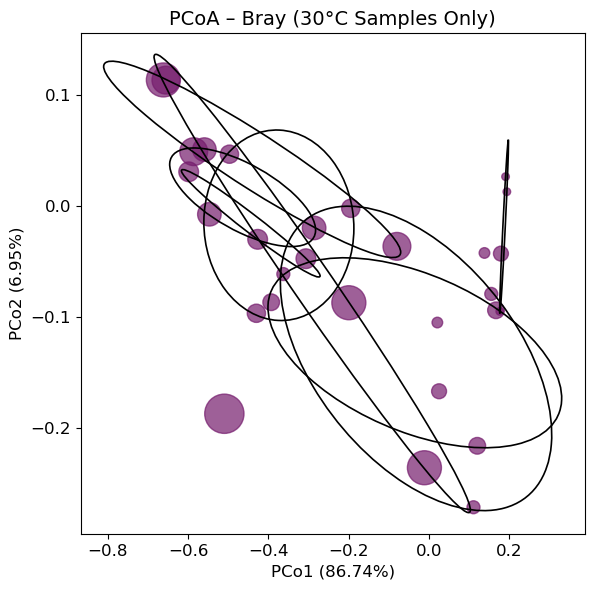

In [46]:
plot_pcoa_for_temperature(
    pcoa_coords=pcoa_bray_curtis_k,
    variance=variance_bray_curtis_k,
    metadata=metadata,
    temperature_filter='30',  # or '4', '30'
    title='PCoA – Bray (30°C Samples Only)'
)
plt.show()


## make biplots with species:

In [118]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [22]:
#import this csv: 20250510_relative_features_ASV_species_names_unique.csv
# as a dataframe, index is the first column:

relative_features_ASV_species_names_unique = pd.read_csv('16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_merged_relative_features_OTU_species_names.csv', sep=',', index_col=0)
relative_features_ASV_species_names_unique.head()

Pediococcus parvulus  Acetobacter cerevisiae  \
366294_118-LP4-16S-0618              0.010526                0.028947   
366294_121-LP4-16S-0621              0.000000                1.000000   
366294_124-LP4-16S-0624              0.000000                0.436842   
366294_128-LP4-16S-0628              0.026455                0.645503   
366294_130-LP4-16S-0630              0.013158                0.347368   

                         Lactobacillus rossiae  \
366294_118-LP4-16S-0618               0.097368   
366294_121-LP4-16S-0621               0.000000   
366294_124-LP4-16S-0624               0.094737   
366294_128-LP4-16S-0628               0.100529   
366294_130-LP4-16S-0630               0.076316   

                         Lactobacillus sanfranciscensis  Lactobacillus brevis  
366294_118-LP4-16S-0618                        0.836842              0.026316  
366294_121-LP4-16S-0621                        0.000000              0.000000  
366294_124-LP4-16S-0624                        0.423684              0.044737  
366294_128-LP4-16S-0628                        0.116402              0.111111  
366294_130-LP4-16S-0630                        0.513158              0.050000

In [23]:
shipping_general_metadata_all_samples.columns.to_list()

['Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2']

In [24]:
#make a new subset of shipping_general_metadata_all with only the columns of interest:

shipping_general_metadata_all_samples_subset = shipping_general_metadata_all_samples[['DNA yield', 'pH',
 'TTA','LAB CFUs','yeast CFUs','mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
#  'temperature',
#  'day'
 ]]


# shipping_general_metadata_all_samples_subset = shipping_general_metadata_all_samples[['mannitol',
#  'glucose',
#  'fructose',
#  'sucrose',
#  'maltose',
#  'succinic acid',
#  'lactic acid',
#  'acetic acid',
#  'ethanol']]

In [56]:
#check if all variables are numeric in shipping_general_metadata_all_samples_subset, and if not, make them numeric:
shipping_general_metadata_all_samples_subset = shipping_general_metadata_all_samples_subset.apply(pd.to_numeric, errors='coerce')

In [25]:
def add_feature_loadings_to_pcoa(ax, pcoa_coords, feature_df,
                                  metadata_vectors=None,
                                  n_species=10,
                                  n_meta=5,
                                  species_color='#468892FF',
                                  meta_color='black',
                                  scaling_factor=0.01,
                                  save_path=None):
    """
    Overlay top correlated features and/or metadata variables as arrows on a PCoA plot.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Existing matplotlib axis with the PCoA scatterplot.
    pcoa_coords : pd.DataFrame
        PCoA coordinates with index as SampleIDs and columns 'PCo1', 'PCo2'.
    feature_df : pd.DataFrame
        Feature table (e.g. ASVs) with index as SampleIDs.
    metadata_vectors : pd.DataFrame or None
        Optional metadata variables (e.g. pH, TTA, etc.) with SampleIDs as index.
    n_species : int
        Number of top species vectors to display.
    n_meta : int
        Number of top metadata vectors to display.
    species_color : str
        Color for species arrows.
    meta_color : str
        Color for metadata arrows.
    scaling_factor : float
        Multiplier for arrow lengths.
    save_path : str or None
        Optional path to save the figure as PDF.
    """

    ### --- Species features ---
    feature_scores = {}
    for feat in feature_df.columns:
        common = pcoa_coords.index.intersection(feature_df[feat].dropna().index)
        if len(common) < 3:
            continue
        x_corr = feature_df.loc[common, feat].corr(pcoa_coords.loc[common, 'PCo1'])
        y_corr = feature_df.loc[common, feat].corr(pcoa_coords.loc[common, 'PCo2'])
        if pd.notnull(x_corr) and pd.notnull(y_corr):
            feature_scores[feat] = abs(x_corr) + abs(y_corr)

    top_species = sorted(feature_scores, key=feature_scores.get, reverse=True)[:n_species]

    for feat in top_species:
        common = pcoa_coords.index.intersection(feature_df[feat].dropna().index)
        x_corr = feature_df.loc[common, feat].corr(pcoa_coords.loc[common, 'PCo1'])
        y_corr = feature_df.loc[common, feat].corr(pcoa_coords.loc[common, 'PCo2'])
        ax.arrow(0, 0, x_corr * scaling_factor, y_corr * scaling_factor,
                 color=species_color, width=0.002, head_width=0.01, alpha=0.8)
        ax.text(x_corr * scaling_factor * 1.2, y_corr * scaling_factor * 1.2,
                feat, fontsize=10, color=species_color, ha='center', va='center')

    ### --- Optional metadata variables ---
    if metadata_vectors is not None:
        meta_scores = {}
        for col in metadata_vectors.columns:
            common = pcoa_coords.index.intersection(metadata_vectors[col].dropna().index)
            if len(common) < 3:
                continue
            x_corr = metadata_vectors.loc[common, col].corr(pcoa_coords.loc[common, 'PCo1'])
            y_corr = metadata_vectors.loc[common, col].corr(pcoa_coords.loc[common, 'PCo2'])
            if pd.notnull(x_corr) and pd.notnull(y_corr):
                meta_scores[col] = abs(x_corr) + abs(y_corr)

        top_meta = sorted(meta_scores, key=meta_scores.get, reverse=True)[:n_meta]

        for col in top_meta:
            common = pcoa_coords.index.intersection(metadata_vectors[col].dropna().index)
            x_corr = metadata_vectors.loc[common, col].corr(pcoa_coords.loc[common, 'PCo1'])
            y_corr = metadata_vectors.loc[common, col].corr(pcoa_coords.loc[common, 'PCo2'])
            ax.arrow(0, 0, x_corr * scaling_factor, y_corr * scaling_factor,
                     color=meta_color, width=0.002, head_width=0.01, alpha=0.8)
            ax.text(x_corr * scaling_factor * 1.5, y_corr * scaling_factor * 1.2,
                    col, fontsize=10, color=meta_color, ha='center', va='center')

    ### --- Save if requested ---
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')


In [26]:
# Coerce all columns to numeric (invalid ones become NaN)
metadata_vectors_clean = shipping_general_metadata_all_samples_subset.apply(pd.to_numeric, errors='coerce')


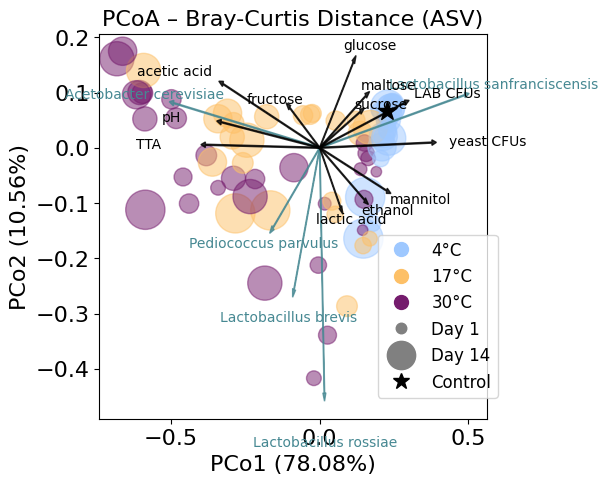

In [29]:
fig, ax = plot_pcoa_with_metadata(
    pcoa_bray_curtis_ASV,
    variance_bray_curtis_ASV,
    metadata,
    title="PCoA – Bray-Curtis Distance (ASV)"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pcoa_bray_curtis_ASV,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=12,
    scaling_factor=0.5,
    save_path="Figures/pcoa_all_16S/Bray-Curtis_16S_biplot_ASV_species_and_envvectors.pdf"
)

plt.show()



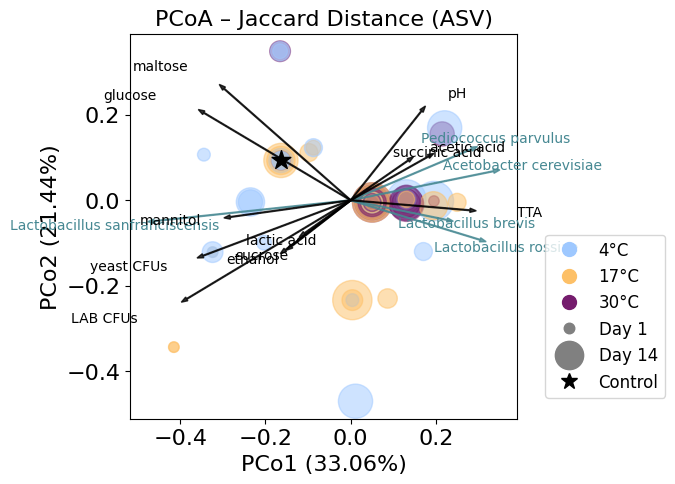

In [33]:
fig, ax = plot_pcoa_with_metadata(
    pcoa_jaccard_ASV,
    variance_jaccard_ASV,
    metadata,
    title="PCoA – Jaccard Distance (ASV)"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pcoa_jaccard_ASV,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=12,
    scaling_factor=1.2,
    save_path="Figures/pcoa_all_16S/Jaccard_16S_biplot_ASV_species_and_envvectors.pdf"
)

plt.show()

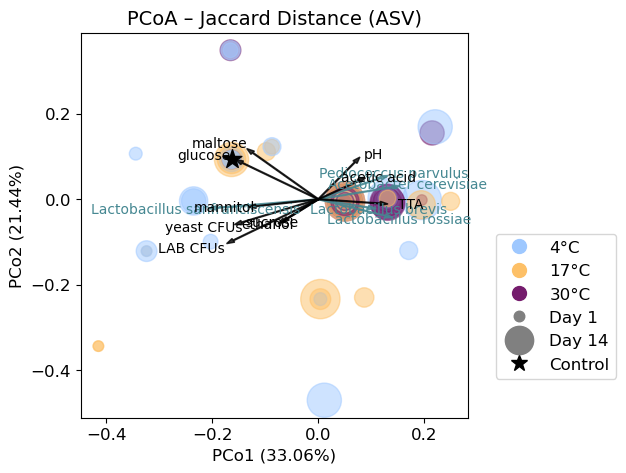

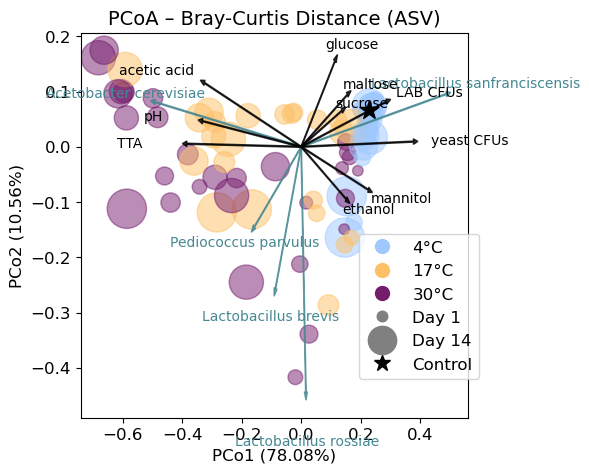

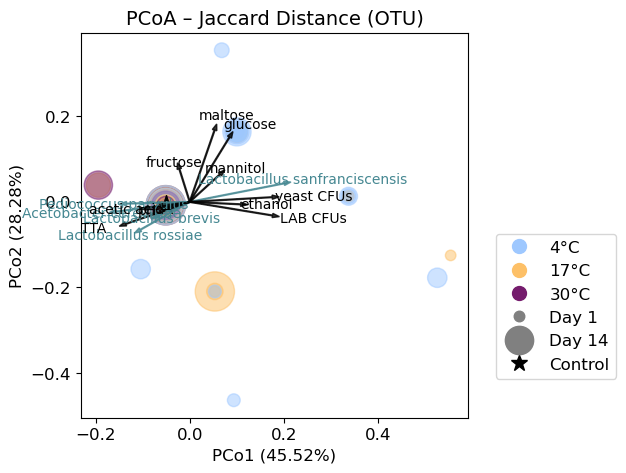

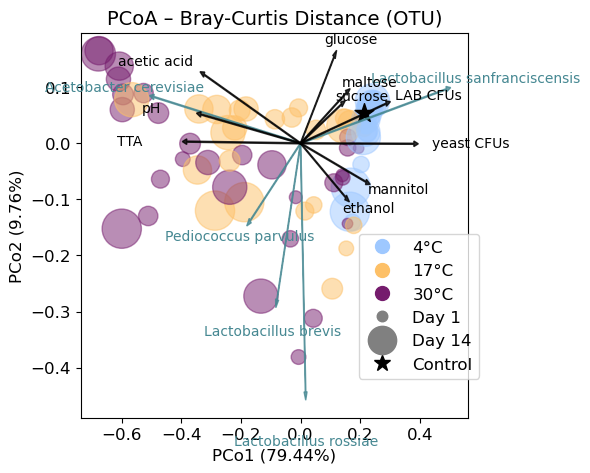

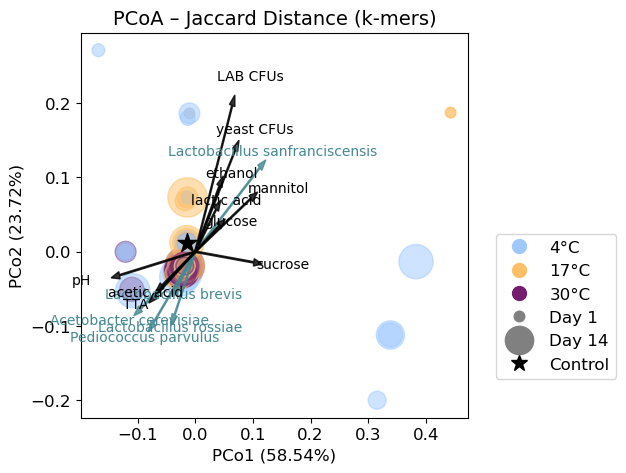

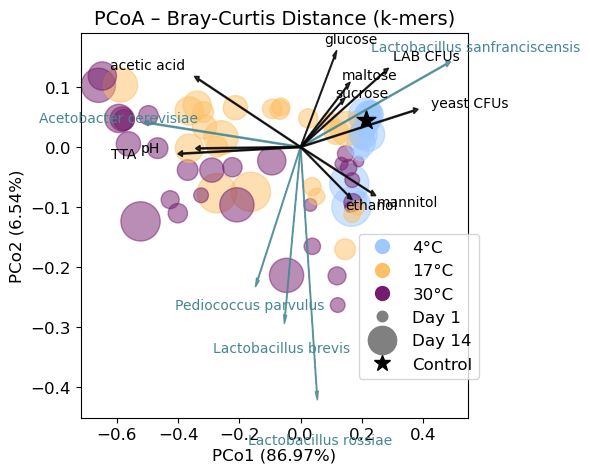

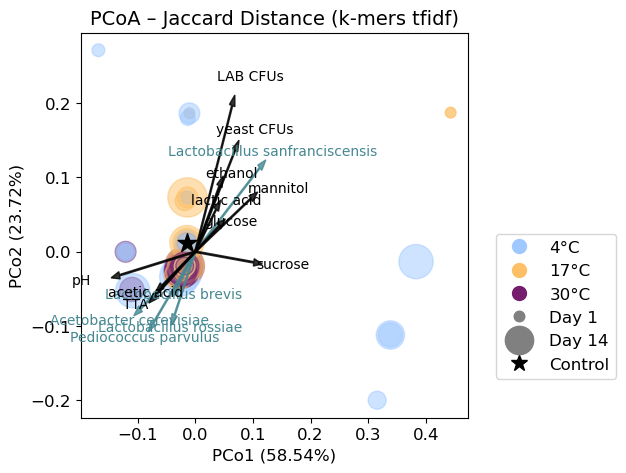

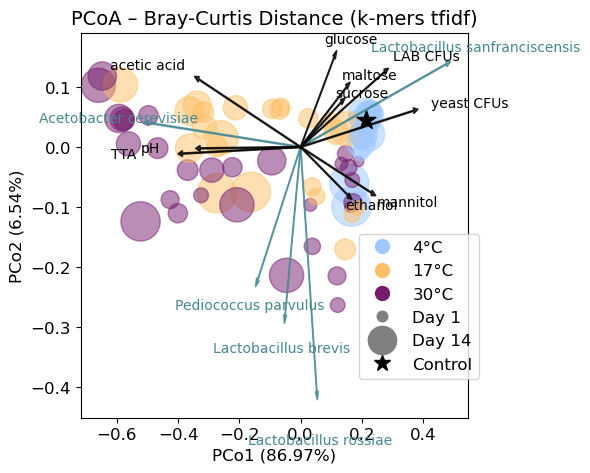

In [59]:
import os

# Output directory for biplots
biplot_dir = "Figures/pcoa_all_16S"
os.makedirs(biplot_dir, exist_ok=True)

# Define input list of (title, coords, variance)
# pcoa_sets = [
#     ("PCoA – Bray-Curtis Distance (ASV)", pcoa_bray_curtis_ASV, variance_bray_curtis_ASV),
#     ("PCoA – Jaccard Distance (ASV)", pcoa_jaccard_ASV, variance_jaccard_ASV),
#     ("PCoA – Bray-Curtis Distance (ASV, merged)", pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged),
#     ("PCoA – Jaccard Distance (ASV, merged)", pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged),
#     # Add more as needed...
# ]

# Loop and generate biplots
for title, coords, variance in pcoa_sets:
    fig, ax = plot_pcoa_with_metadata(
        coords,
        variance,
        metadata,
        title=title
    )

    # Generate filename
    filename = title.replace(" ", "_").replace("(", "").replace(")", "").replace("–", "-") + "_biplot_16S.pdf"
    filepath = os.path.join(biplot_dir, filename)

    # Add feature and metadata vectors
    add_feature_loadings_to_pcoa(
        ax=ax,
        pcoa_coords=coords,
        feature_df=relative_features_ASV_species_names_unique,
        metadata_vectors=metadata_vectors_clean,  # e.g. subset of md[['pH', 'TTA', ...]]
        n_species=5,
        n_meta=10,
        scaling_factor=0.5,
        save_path=filepath
    )
    plt.show(fig)
    plt.close(fig)  # prevent inline display if not desired


## PERMDISP: to find out which method might be best, and also whether to use merged or non merged

In [60]:
dms

{'jaccard_dm_16S_ASV': <skbio.stats.distance._base.DistanceMatrix at 0x1898fa710>,
 'jaccard_dm_16S_ASV_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898fb4c0>,
 'bray_dm_16S_ASV ': <skbio.stats.distance._base.DistanceMatrix at 0x1898fb6a0>,
 'bray_dm_16S_ASV_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898f94e0>,
 'jaccard_dm_16S_OTU': <skbio.stats.distance._base.DistanceMatrix at 0x1898f96f0>,
 'jaccard_dm_16S_OTU_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898fa890>,
 'bray_dm_16S_OTU': <skbio.stats.distance._base.DistanceMatrix at 0x1898fab30>,
 'bray_dm_16S_OTU_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898fb580>,
 'jaccard_dm_16S_k': <skbio.stats.distance._base.DistanceMatrix at 0x1898f9540>,
 'jaccard_dm_16S_k_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898fa080>,
 'bray_dm_16S_k': <skbio.stats.distance._base.DistanceMatrix at 0x1898fa6b0>,
 'bray_dm_16S_k_merged': <skbio.stats.distance._base.DistanceMatrix at 0

In [61]:
# Check sample match between metadata and distance matrix
any_missing = [name for name, dm in dms.items() if not set(dm.ids).issubset(set(metadata.index))]
print("Distance matrices with unmatched IDs:", any_missing)


Distance matrices with unmatched IDs: []


In [10]:
metadata

NameError: name 'metadata' is not defined

In [114]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

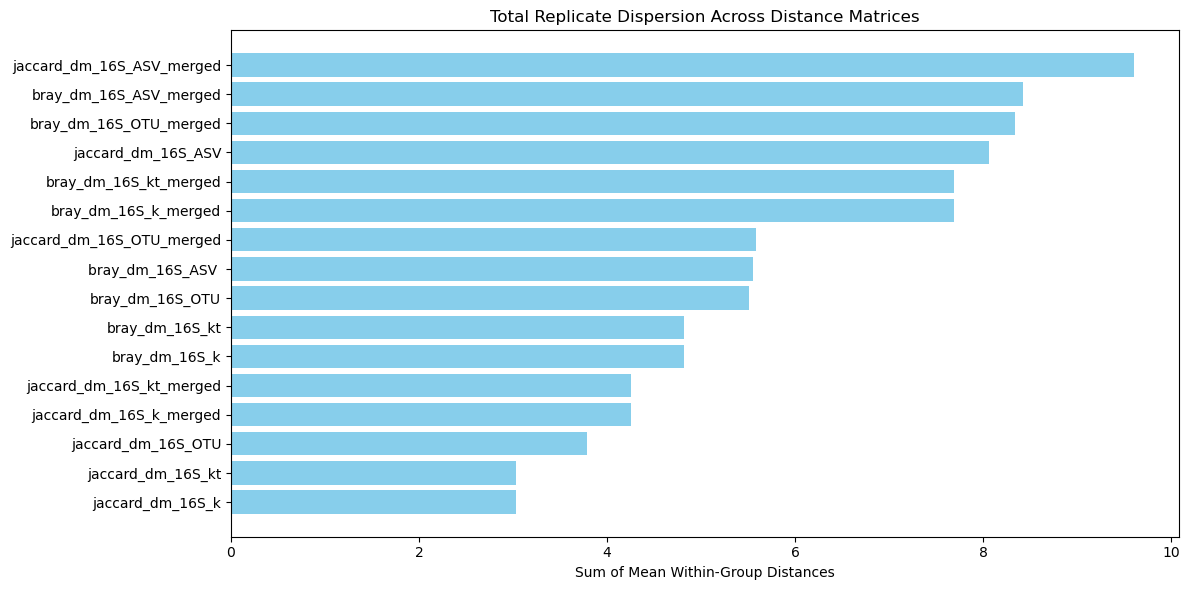

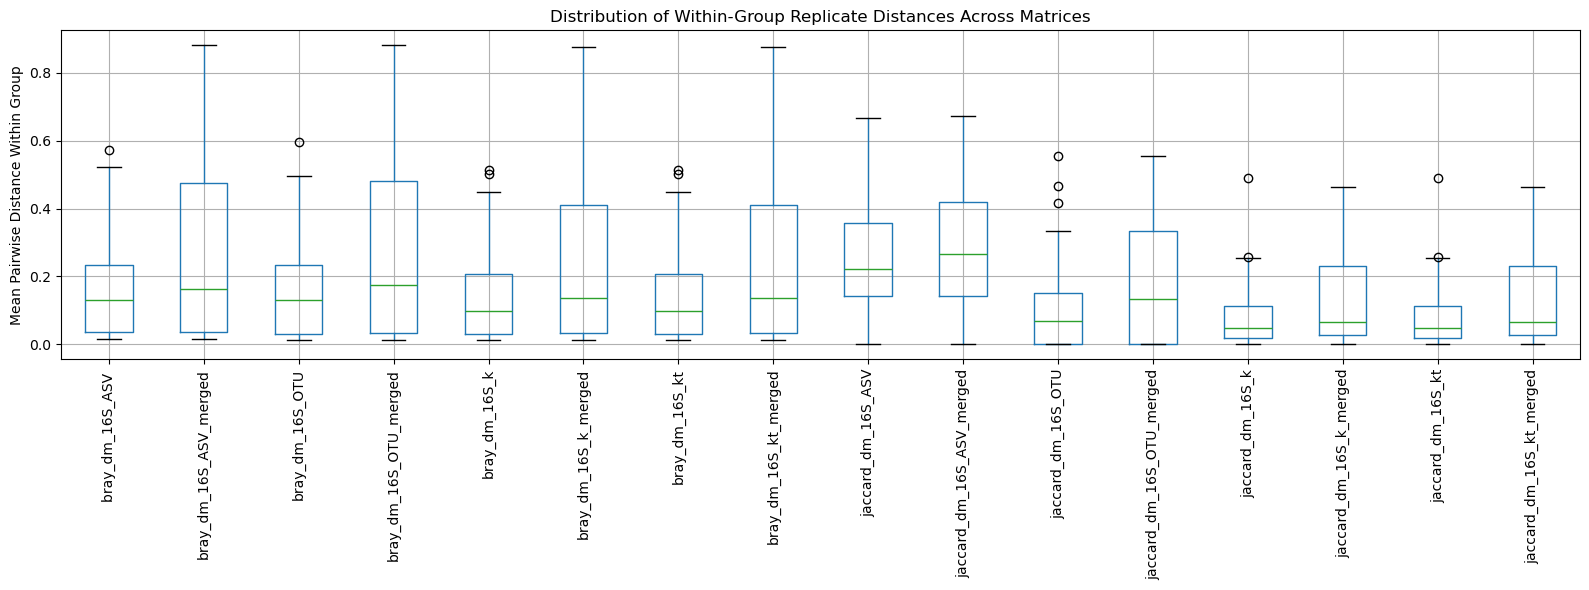

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Store per-group and summary metrics
group_distance_records = []
summary_stats = []

# Loop through distance matrices
for name, dm in dms.items():
    ids = [str(i) if not isinstance(i, str) else i for i in dm.ids]

    meta = metadata.loc[ids].copy()

    # Create replicate group labels: temperature + day
    meta['group'] = meta['temperature'].astype(str) + "_" + meta['day'].astype(str)

    group_means = []

    for group, group_df in meta.groupby('group'):
        group_ids = group_df.index.tolist()
        if len(group_ids) < 2:
            continue  # skip groups with only 1 sample

        sub_dm = dm.filter(group_ids)
        dists = sub_dm.condensed_form()

        mean_dist = dists.mean()
        sum_dist = dists.sum()

        group_distance_records.append({
            'Matrix': name,
            'Group': group,
            'Temperature': group_df['temperature'].iloc[0],
            'Day': group_df['day'].iloc[0],
            'Mean Distance': mean_dist,
            'Sum Distance': sum_dist,
            'N Samples': len(group_ids)
        })

        group_means.append(mean_dist)

    # Aggregate matrix-level stats
    if group_means:
        summary_stats.append({
            'Matrix': name,
            'Overall Mean Distance': np.mean(group_means),
            'Overall Std Distance': np.std(group_means),
            'Overall Sum of Group Distances': sum(group_means),
            'N Groups': len(group_means)
        })
    else:
        summary_stats.append({
            'Matrix': name,
            'Overall Mean Distance': np.nan,
            'Overall Std Distance': np.nan,
            'Overall Sum of Group Distances': np.nan,
            'N Groups': 0
        })

# Convert to DataFrames
group_df = pd.DataFrame(group_distance_records)
summary_df = pd.DataFrame(summary_stats).sort_values(by='Overall Sum of Group Distances')

# 🔍 Save summary for reporting
summary_df.to_csv("Stats/20250514_summary_within_group_distances_16S.csv", index=False)
group_df.to_csv("Stats/20250514_groupwise_within_group_distances_16S.csv", index=False)

# 📊 Plot 1: Total within-group distance per matrix
plt.figure(figsize=(12, 6))
plt.barh(summary_df['Matrix'], summary_df['Overall Sum of Group Distances'], color='skyblue')
plt.xlabel('Sum of Mean Within-Group Distances')
plt.title('Total Replicate Dispersion Across Distance Matrices')
plt.tight_layout()
plt.show()

# 📊 Plot 2: Per-group distances (across all matrices)
plt.figure(figsize=(16, 6))
group_df['GroupLabel'] = group_df['Temperature'].astype(str) + "_day_" + group_df['Day'].astype(str)
pivot_df = group_df.pivot(index='GroupLabel', columns='Matrix', values='Mean Distance')
pivot_df.boxplot(rot=90)
plt.ylabel('Mean Pairwise Distance Within Group')
plt.title('Distribution of Within-Group Replicate Distances Across Matrices')
plt.tight_layout()
plt.show()


### plot wihtin group distances over time per temperature (to check if variance is similar)

In [64]:
dms

{'jaccard_dm_16S_ASV': <skbio.stats.distance._base.DistanceMatrix at 0x1898fa710>,
 'jaccard_dm_16S_ASV_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898fb4c0>,
 'bray_dm_16S_ASV ': <skbio.stats.distance._base.DistanceMatrix at 0x1898fb6a0>,
 'bray_dm_16S_ASV_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898f94e0>,
 'jaccard_dm_16S_OTU': <skbio.stats.distance._base.DistanceMatrix at 0x1898f96f0>,
 'jaccard_dm_16S_OTU_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898fa890>,
 'bray_dm_16S_OTU': <skbio.stats.distance._base.DistanceMatrix at 0x1898fab30>,
 'bray_dm_16S_OTU_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898fb580>,
 'jaccard_dm_16S_k': <skbio.stats.distance._base.DistanceMatrix at 0x1898f9540>,
 'jaccard_dm_16S_k_merged': <skbio.stats.distance._base.DistanceMatrix at 0x1898fa080>,
 'bray_dm_16S_k': <skbio.stats.distance._base.DistanceMatrix at 0x1898fa6b0>,
 'bray_dm_16S_k_merged': <skbio.stats.distance._base.DistanceMatrix at 0

In [69]:
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_days_with_significance_letters(data, value_col, temperature_value,
                                        title="", ylabel="", colors=None,
                                        figsize=(8, 4), text_y_offset=0.05,
                                        return_stats=False):
    """
    Plot boxplots for one temperature group across days with Tukey HSD letters.
    Optionally returns the Tukey HSD stats table.
    """
    # Subset
    df = data[data['temperature'] == temperature_value].copy()
    df = df.dropna(subset=[value_col, 'day'])

    df['day'] = df['day'].astype(int)
    df['day_str'] = df['day'].astype(str)

    # Tukey HSD
    mc = MultiComparison(df[value_col], df['day_str'])
    tukey = mc.tukeyhsd()

    # Convert summary to DataFrame
    summary_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
    summary_df['reject'] = summary_df['reject'].astype(str) == 'True'

    # Compact letter display
    def get_cld_from_summary(summary_df):
        from collections import defaultdict
        groups = sorted(set(summary_df['group1']) | set(summary_df['group2']))
        group_dict = {g: set() for g in groups}
        current_letter = ord('a')
        remaining = set(groups)

        while remaining:
            this_letter = chr(current_letter)
            this_group = sorted(remaining)[0]
            compatible = {this_group}
            for g in remaining:
                mask1 = (summary_df['group1'] == this_group) & (summary_df['group2'] == g)
                mask2 = (summary_df['group1'] == g) & (summary_df['group2'] == this_group)
                is_sig = summary_df[mask1 | mask2]['reject'].any()
                if not is_sig:
                    compatible.add(g)
            for g in compatible:
                group_dict[g].add(this_letter)
            remaining -= compatible
            current_letter += 1
        return {k: ''.join(sorted(v)) for k, v in group_dict.items()}

    letter_map = get_cld_from_summary(summary_df)

    # Plotting
    plt.figure(figsize=figsize)
    day_order = sorted(df['day'].unique())
    box_palette = (df.groupby('day')['color'].first().reindex(day_order).to_dict()
                   if colors is not None else None)

    sns.boxplot(data=df, x='day', y=value_col, palette=box_palette, order=day_order)
    sns.stripplot(data=df, x='day', y=value_col, color='black', size=4, jitter=True, order=day_order)

    # Add letters
    max_vals = df.groupby('day')[value_col].max()
    for i, day in enumerate(day_order):
        label = letter_map.get(str(day), "")
        y = max_vals.loc[day] + text_y_offset * (max_vals.max() - max_vals.min())
        plt.text(i, y, label, ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel("Days", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()
    plt.tight_layout()

    if return_stats:
        return plt.gcf(), summary_df
    else:
        return plt.gcf()

In [67]:
from skbio import DistanceMatrix
from itertools import combinations
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Compute pairwise within-group distances and make long-form DF
pairwise_records = []

for name, dm in dms.items():
    ids = [str(i) for i in dm.ids]  # Ensure all sample IDs are strings
    ids = [i.strip() for i in ids]  # Remove potential whitespace

    # Check which IDs are missing from metadata before subsetting
    missing = [i for i in ids if i not in metadata.index]
    if missing:
        print(f"⚠️ {len(missing)} IDs not found in metadata: {missing[:5]}...")

    # Only use those present in both
    valid_ids = [i for i in ids if i in metadata.index]
    meta = metadata.loc[valid_ids].copy()

    meta['group'] = meta['temperature'].astype(str) + "_" + meta['day'].astype(str)

    for group, group_df in meta.groupby('group'):
        group_ids = group_df.index.tolist()
        if len(group_ids) < 2:
            continue

        sub_dm = dm.filter(group_ids)

        for i, j in combinations(range(len(group_ids)), 2):
            sample_i, sample_j = group_ids[i], group_ids[j]
            dist = sub_dm[sample_i, sample_j]

            pairwise_records.append({
                'Matrix': name,
                'Sample1': sample_i,
                'Sample2': sample_j,
                'Distance': dist,
                'Temperature': group_df['temperature'].iloc[0],
                'Day': group_df['day'].iloc[0]
            })

pairwise_df = pd.DataFrame(pairwise_records)

# Save for inspection
pairwise_df.to_csv("Stats/20250514_pairwise_within_group_distances_long_16S.csv", index=False)


✅ Pairwise distance data saved.


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


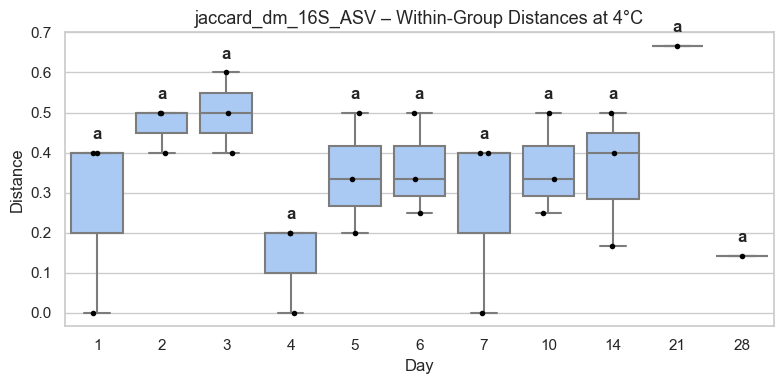

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_ASV_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


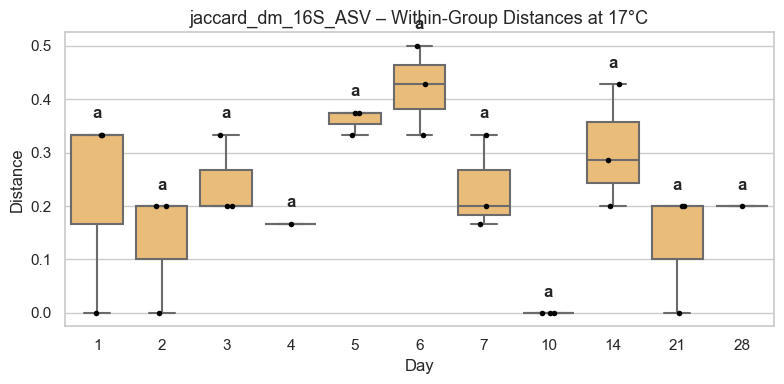

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_ASV_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


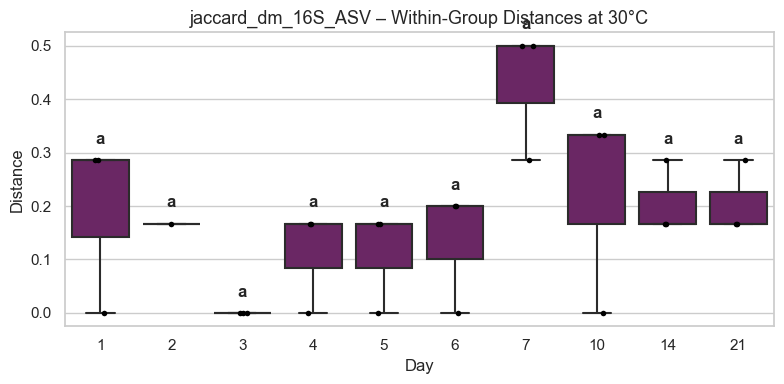

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_ASV_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


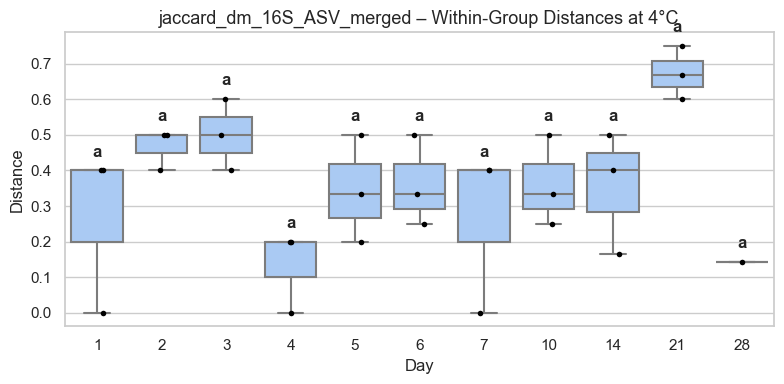

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_ASV_merged_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


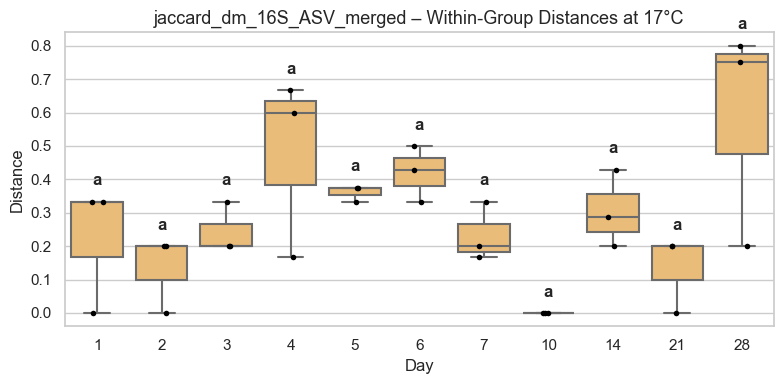

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_ASV_merged_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


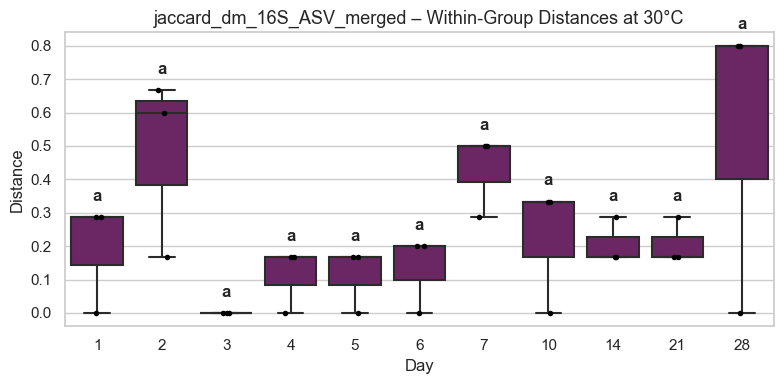

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_ASV_merged_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


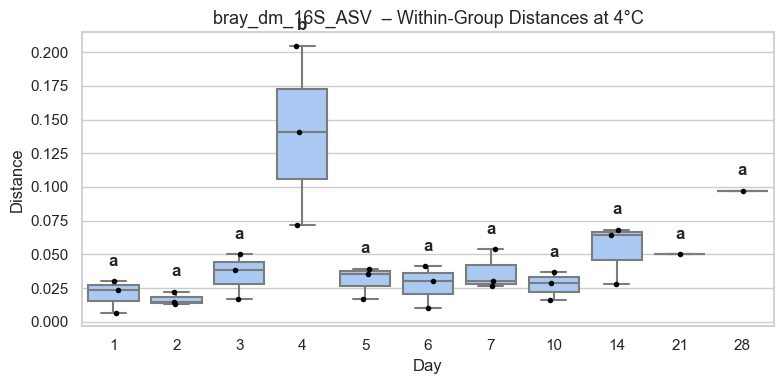

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_ASV__Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


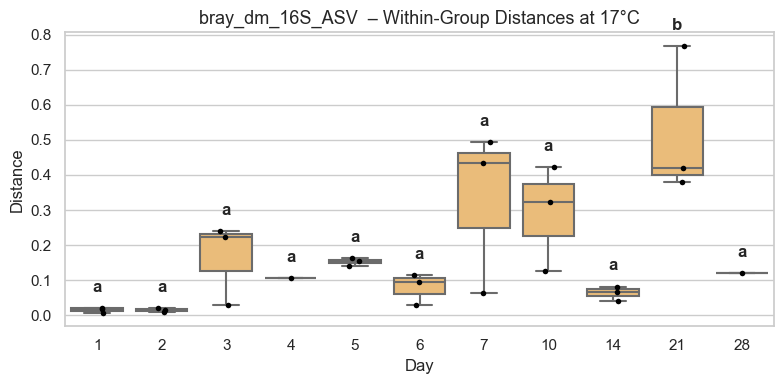

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_ASV__Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


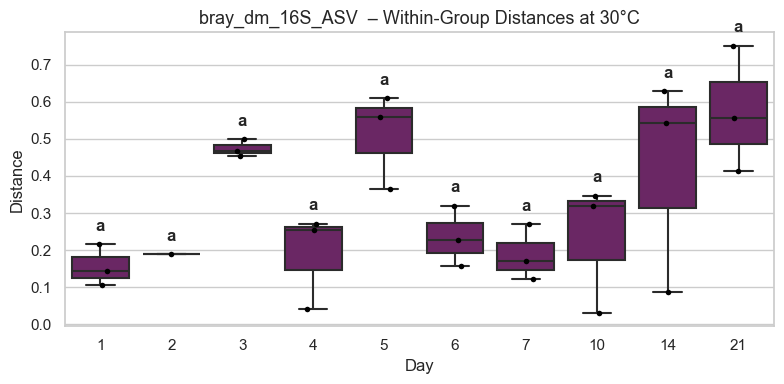

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_ASV__Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


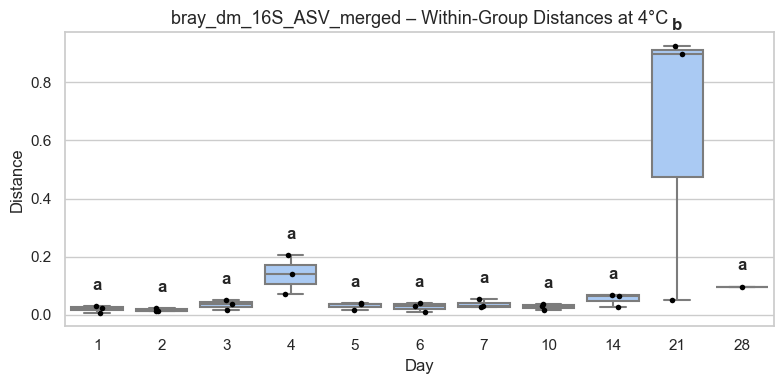

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_ASV_merged_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


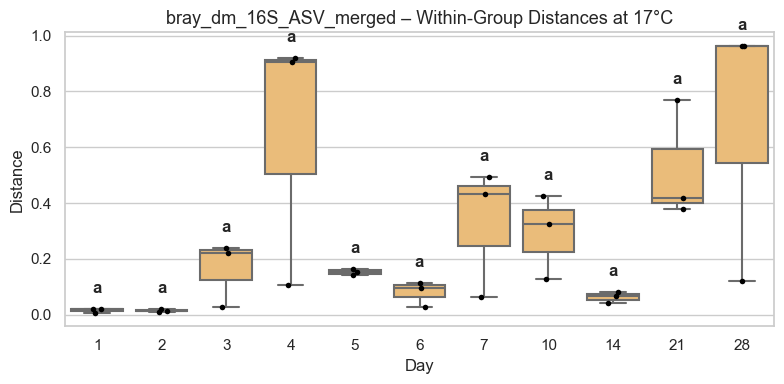

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_ASV_merged_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


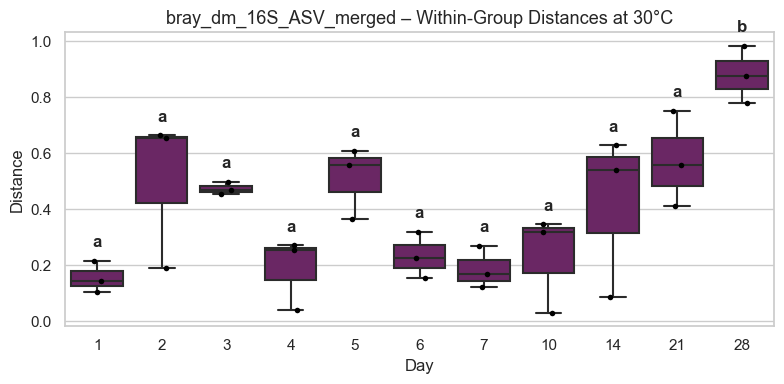

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_ASV_merged_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


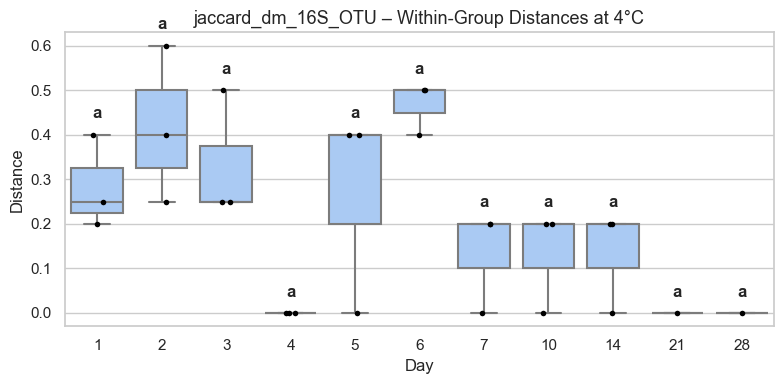

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_OTU_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


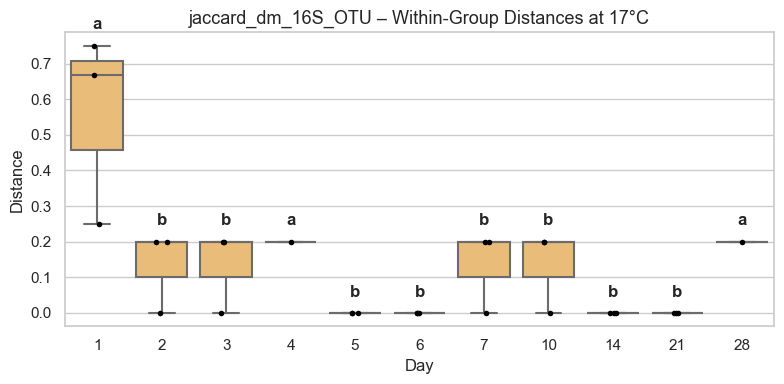

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_OTU_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


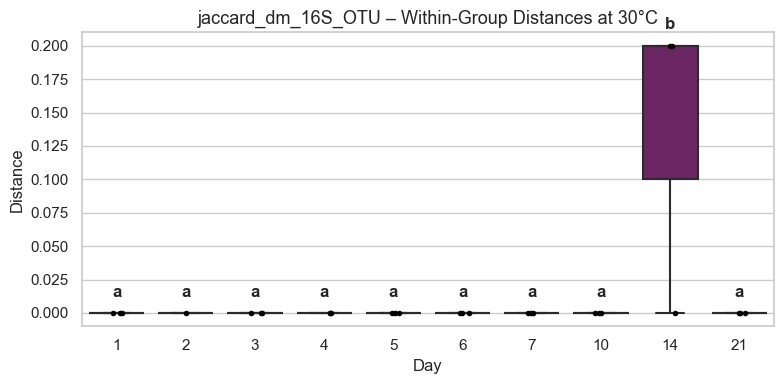

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_OTU_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


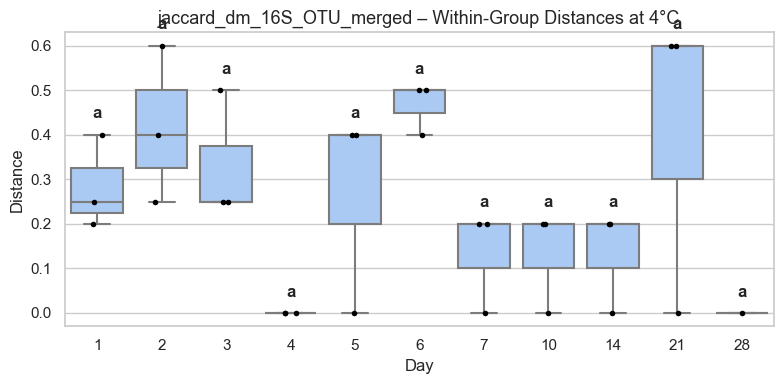

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_OTU_merged_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


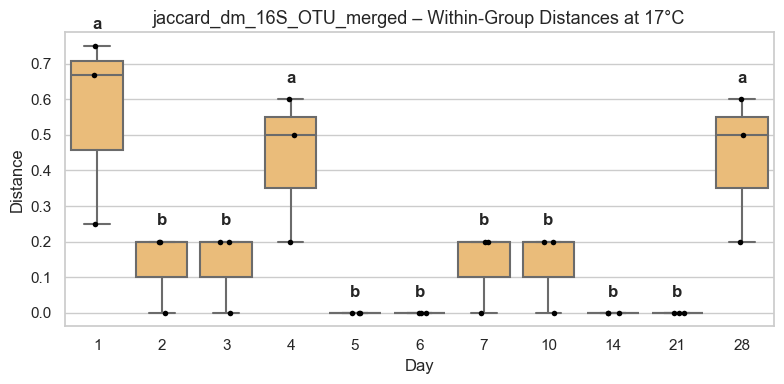

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_OTU_merged_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


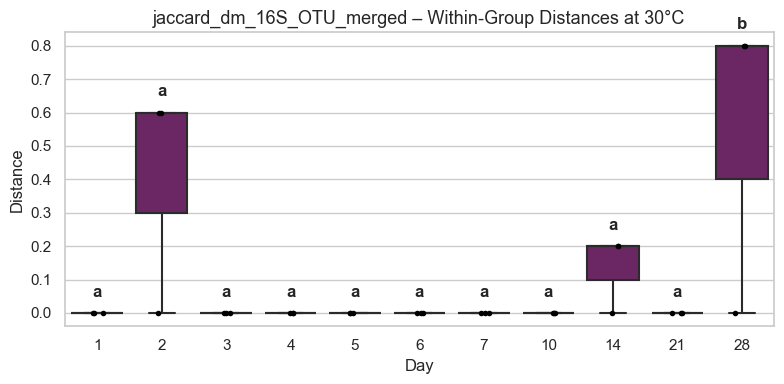

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_OTU_merged_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


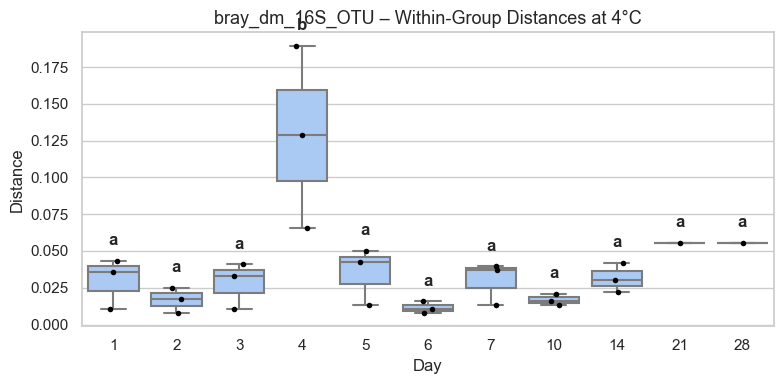

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_OTU_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


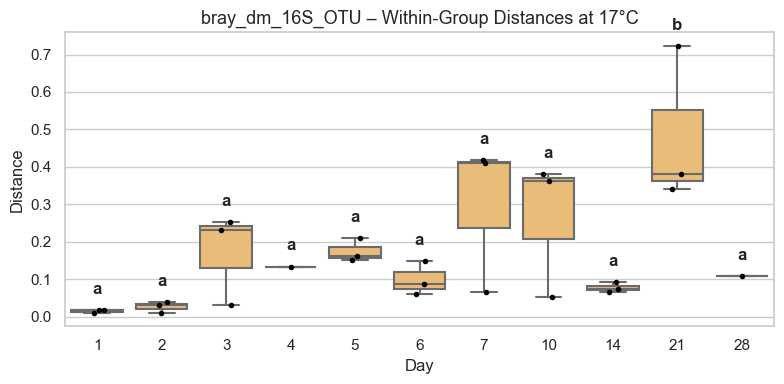

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_OTU_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


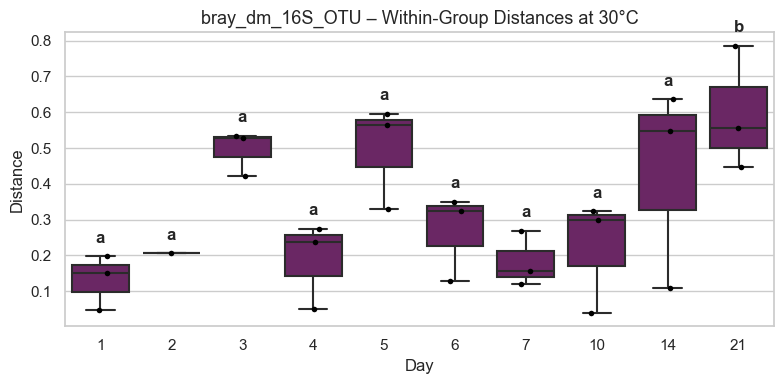

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_OTU_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


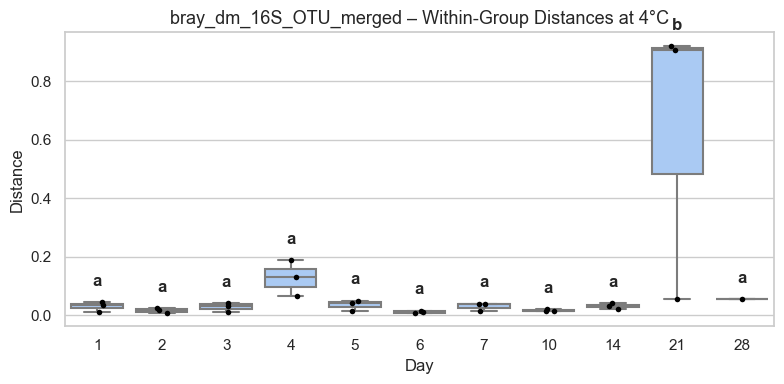

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_OTU_merged_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


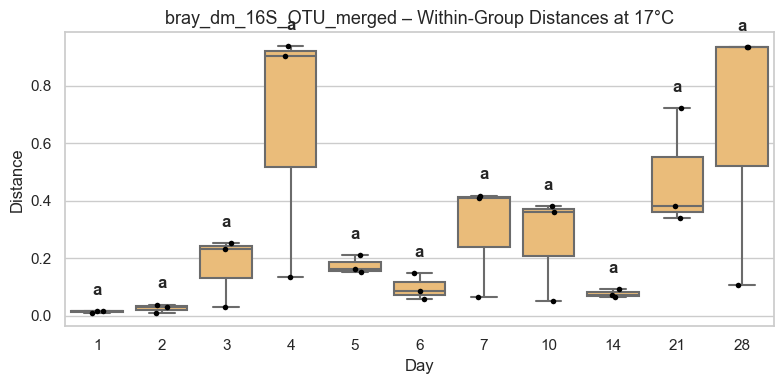

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_OTU_merged_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


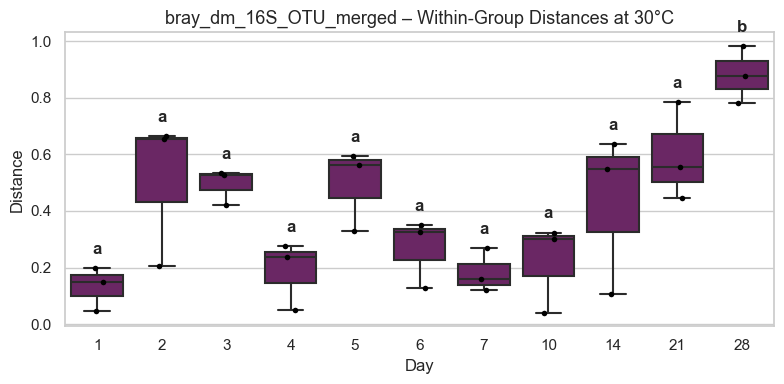

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_OTU_merged_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


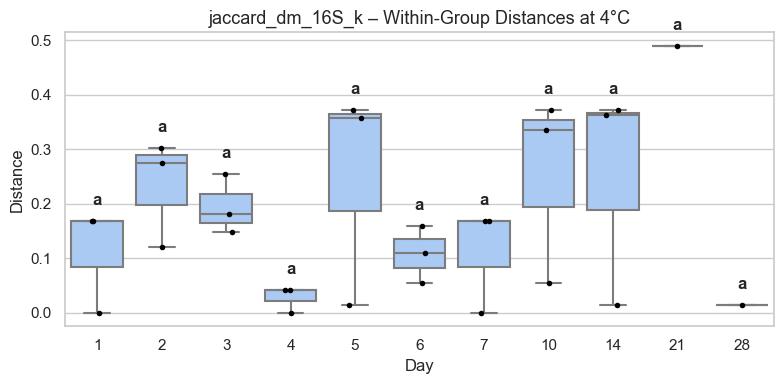

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_k_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


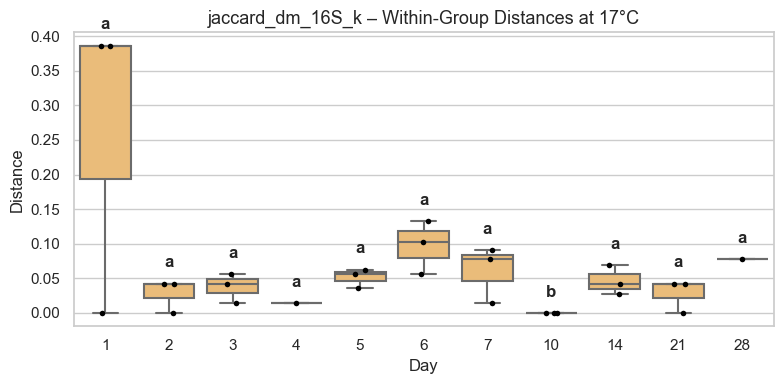

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_k_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


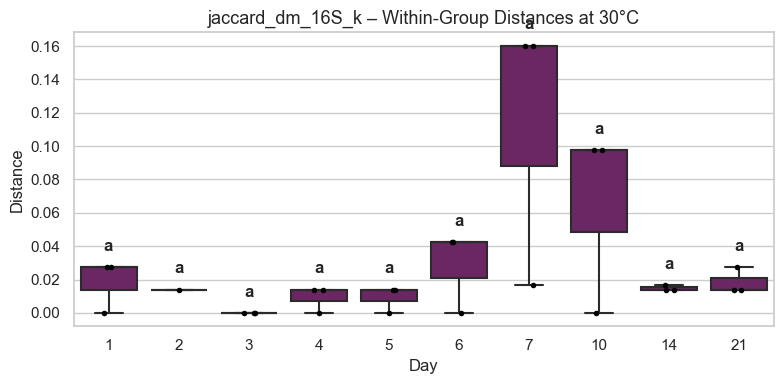

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_k_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


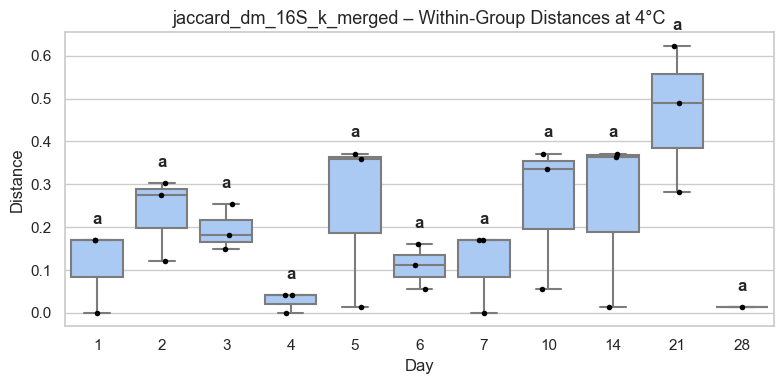

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_k_merged_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


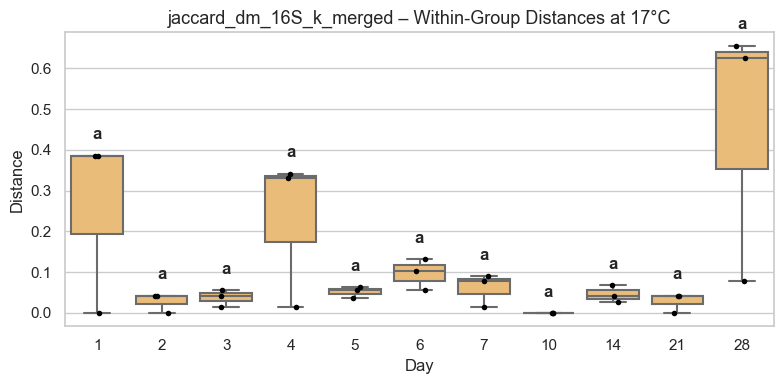

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_k_merged_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


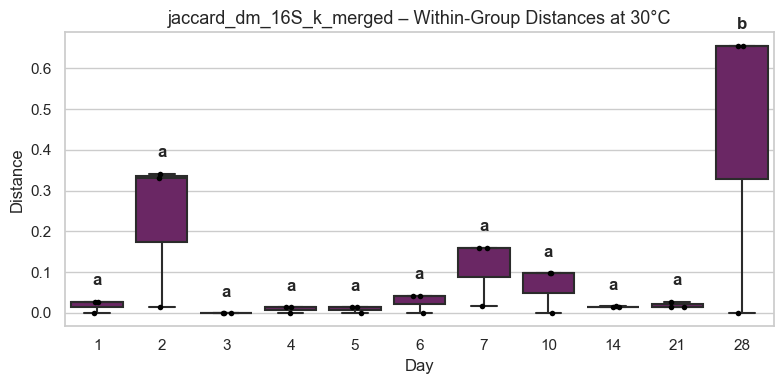

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_k_merged_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


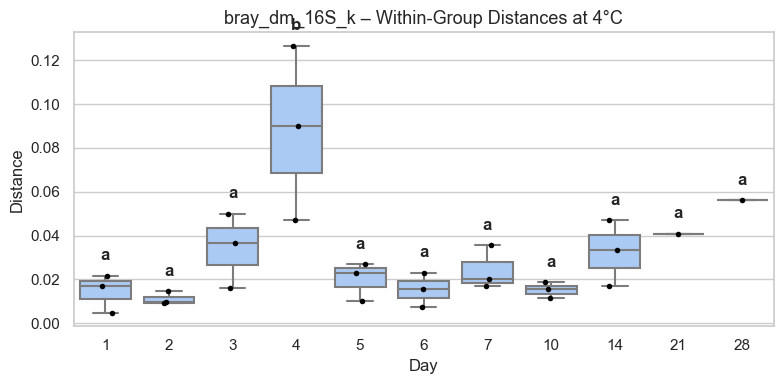

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_k_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


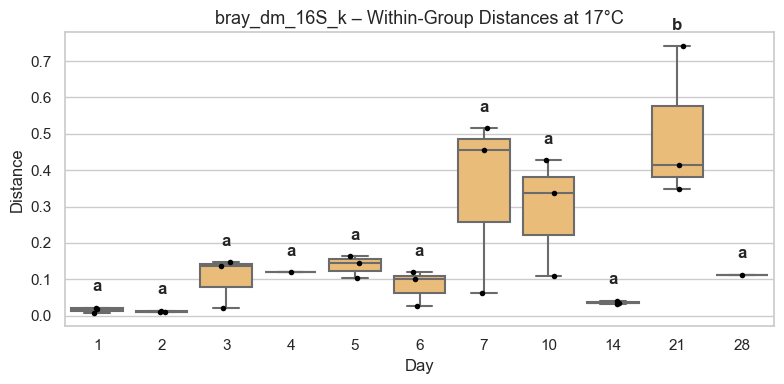

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_k_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


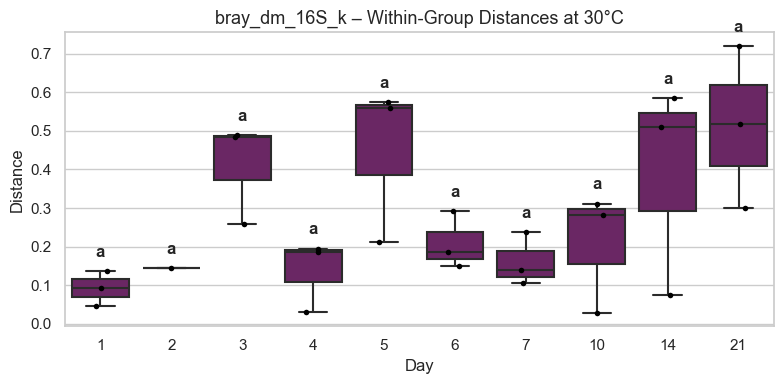

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_k_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


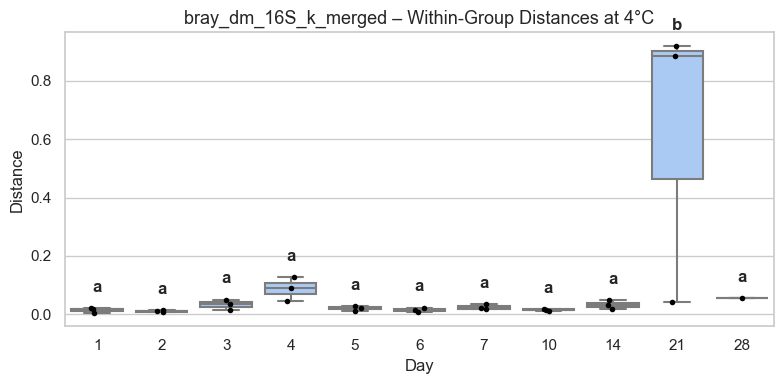

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_k_merged_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


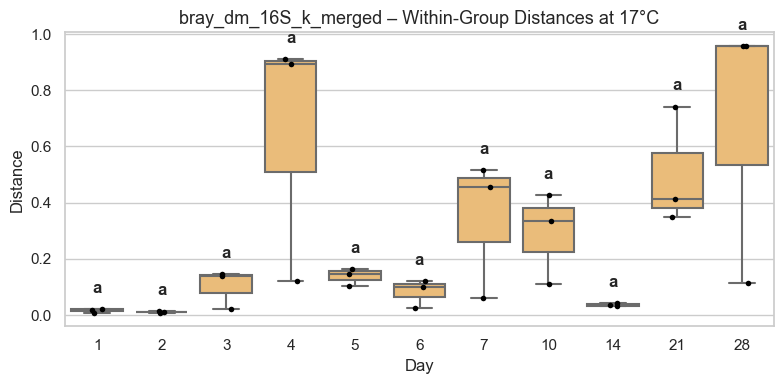

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_k_merged_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


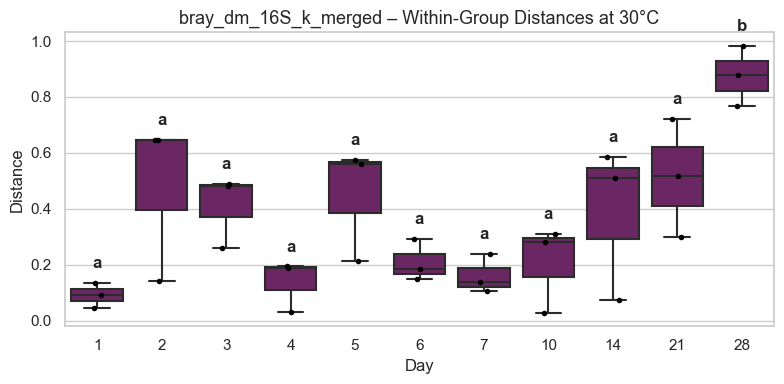

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_k_merged_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


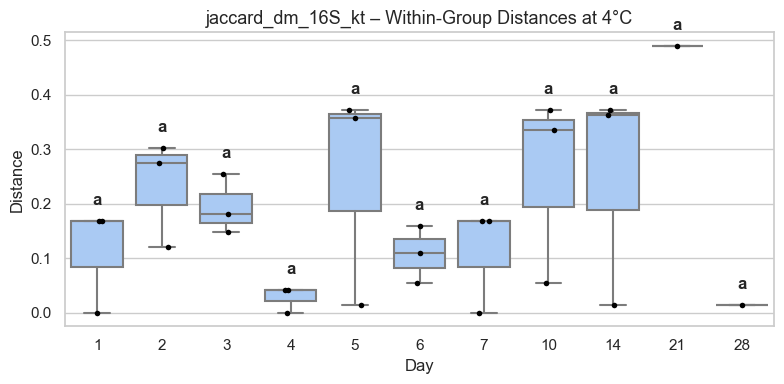

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_kt_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


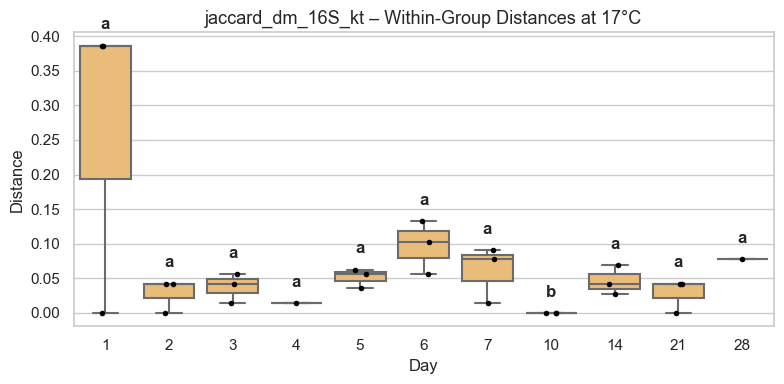

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_kt_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


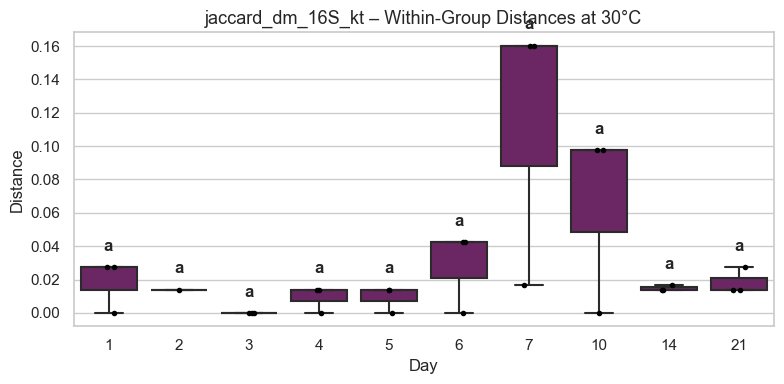

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_kt_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


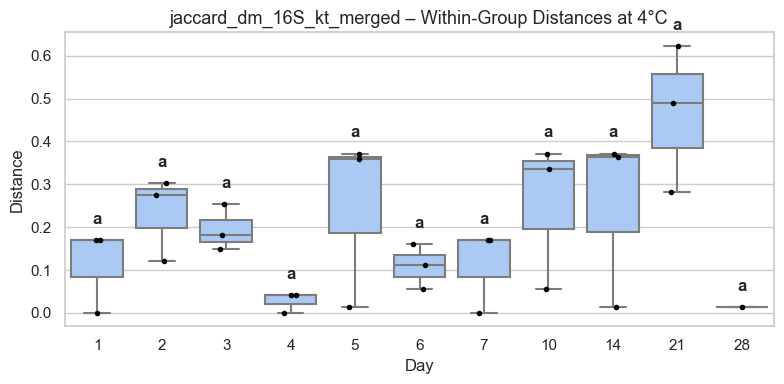

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_kt_merged_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


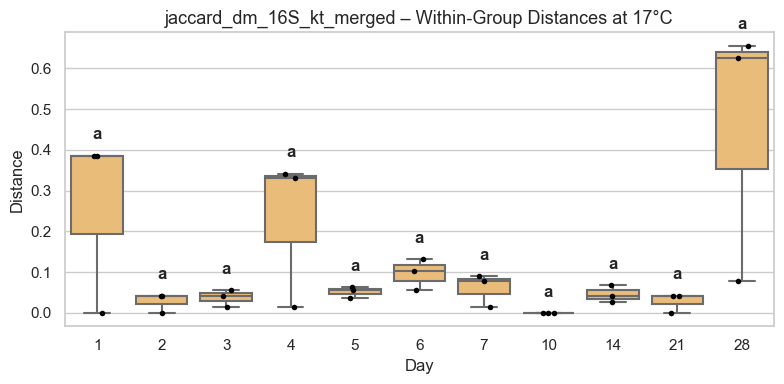

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_kt_merged_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


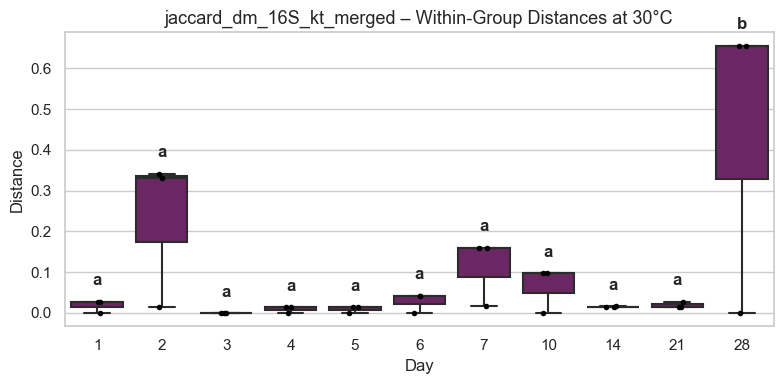

📊 Saved: Figures/pairwise_within_group_distances_Tukey/jaccard_dm_16S_kt_merged_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


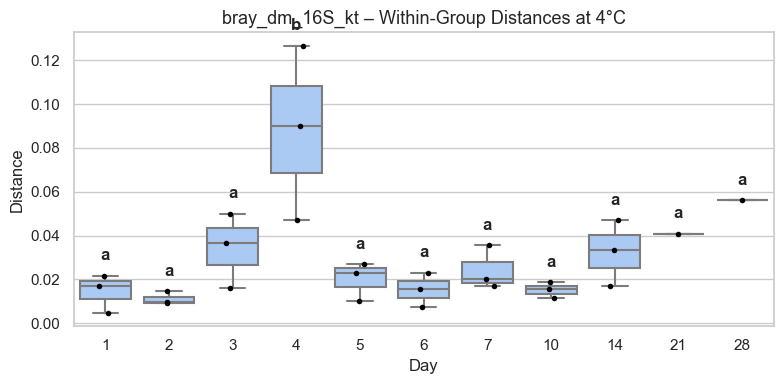

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_kt_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


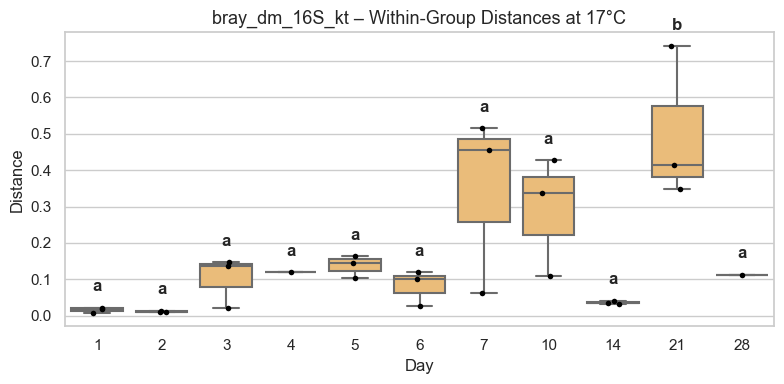

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_kt_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


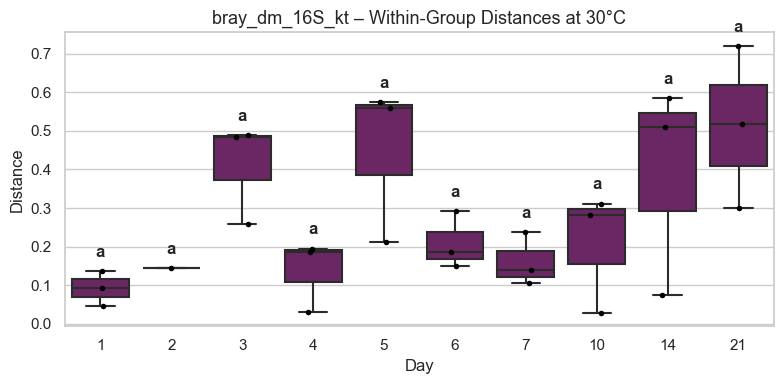

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_kt_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


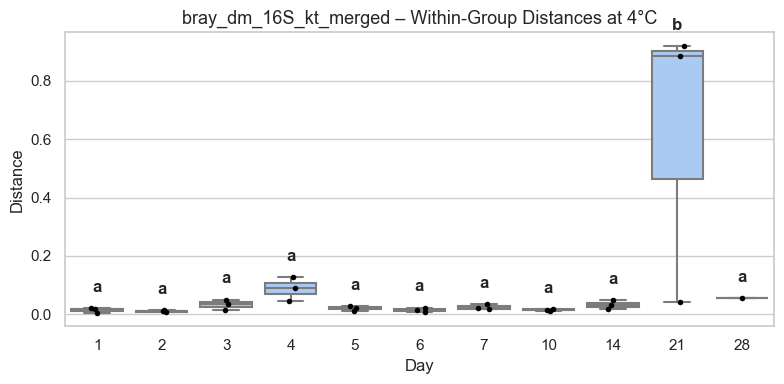

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_kt_merged_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


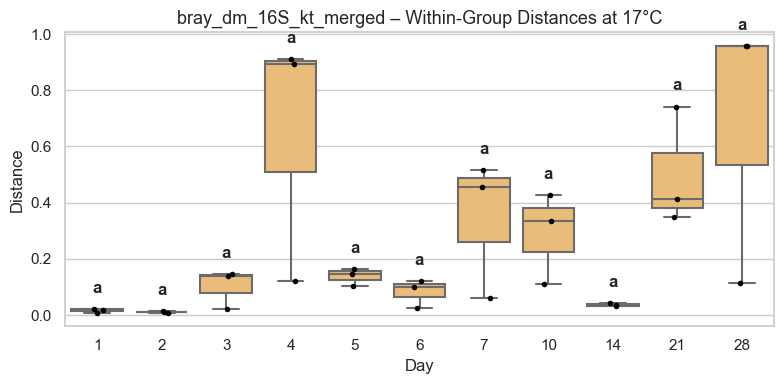

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_kt_merged_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


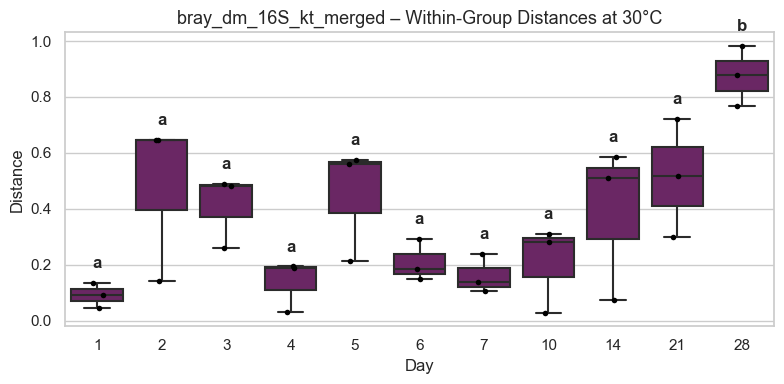

📊 Saved: Figures/pairwise_within_group_distances_Tukey/bray_dm_16S_kt_merged_Tukey_30C.pdf
✅ Tukey HSD summary exported.


In [70]:
from skbio import DistanceMatrix
from itertools import combinations
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure seaborn default styling
sns.set(style="whitegrid")

# Prepare output folders
# os.makedirs("Figures/pairwise_within_group_distances_Tukey/", exist_ok=True)
# os.makedirs("Stats/", exist_ok=True)

# ---- Step 1: Compute pairwise distances ---- #
pairwise_records = []

for name, dm in dms.items():
    ids = [str(i).strip() for i in dm.ids]
    valid_ids = [i for i in ids if i in metadata.index]
    meta = metadata.loc[valid_ids].copy()

    meta['group'] = meta['temperature'].astype(str) + "_" + meta['day'].astype(str)

    for group, group_df in meta.groupby('group'):
        group_ids = group_df.index.tolist()
        if len(group_ids) < 2:
            continue
        sub_dm = dm.filter(group_ids)

        for i, j in combinations(range(len(group_ids)), 2):
            sample_i, sample_j = group_ids[i], group_ids[j]
            dist = sub_dm[sample_i, sample_j]

            pairwise_records.append({
                'Matrix': name,
                'Sample1': sample_i,
                'Sample2': sample_j,
                'Distance': dist,
                'Temperature': group_df['temperature'].iloc[0],
                'Day': group_df['day'].iloc[0]
            })

pairwise_df = pd.DataFrame(pairwise_records)
# pairwise_df.to_csv("Stats/20250514_pairwise_within_group_distances_long_16S.csv", index=False)
print("✅ Pairwise distance data saved.")

# ---- Step 2: Plotting and Tukey with letters ---- #
def get_cld_from_summary(summary_df):
    """Generate compact letter display (CLD) from Tukey summary."""
    groups = sorted(set(summary_df['group1']) | set(summary_df['group2']))
    group_dict = {g: set() for g in groups}
    current_letter = ord('a')
    remaining = set(groups)

    while remaining:
        this_letter = chr(current_letter)
        this_group = sorted(remaining)[0]
        compatible = {this_group}
        for g in remaining:
            mask1 = (summary_df['group1'] == this_group) & (summary_df['group2'] == g)
            mask2 = (summary_df['group1'] == g) & (summary_df['group2'] == this_group)
            is_sig = summary_df[mask1 | mask2]['reject'].any()
            if not is_sig:
                compatible.add(g)
        for g in compatible:
            group_dict[g].add(this_letter)
        remaining -= compatible
        current_letter += 1

    return {k: ''.join(sorted(v)) for k, v in group_dict.items()}

# Build temperature-color map
temp_colors = metadata.drop_duplicates('temperature')[['temperature', 'color2']] \
                      .set_index('temperature')['color2'].to_dict()

all_tukey_stats = []

for matrix_name in pairwise_df['Matrix'].unique():
    for temp in [4, 17, 30]:
        df_temp = pairwise_df[(pairwise_df['Matrix'] == matrix_name) &
                              (pairwise_df['Temperature'] == temp)].copy()

        if df_temp['Day'].nunique() < 2:
            continue

        df_temp['day_str'] = df_temp['Day'].astype(str)
        mc = MultiComparison(df_temp['Distance'], df_temp['day_str'])
        tukey = mc.tukeyhsd()

        summary_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
        summary_df['Matrix'] = matrix_name
        summary_df['Temperature'] = temp
        summary_df['reject'] = summary_df['reject'].astype(str) == 'True'

        all_tukey_stats.append(summary_df)

        letter_map = get_cld_from_summary(summary_df)
        max_vals = df_temp.groupby('Day')['Distance'].max()

        # ---- Plot ---- #
        plt.figure(figsize=(8, 4))
        palette = {d: temp_colors[temp] for d in sorted(df_temp['Day'].unique())}
        sns.boxplot(data=df_temp, x='Day', y='Distance', palette=palette)
        sns.stripplot(data=df_temp, x='Day', y='Distance', color='black', size=4, jitter=True)

        # Add significance letters
        for i, day in enumerate(sorted(df_temp['Day'].unique())):
            label = letter_map.get(str(day), "")
            y = max_vals.loc[day] + 0.05 * (max_vals.max() - max_vals.min())
            plt.text(i, y, label, ha='center', va='bottom', fontsize=12, fontweight='bold')

        plt.title(f"{matrix_name} – Within-Group Distances at {temp}°C", fontsize=13)
        plt.ylabel("Distance", fontsize=12)
        plt.xlabel("Day", fontsize=12)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        plt.tight_layout()

        fname = f"Figures/pairwise_within_group_distances_Tukey/{matrix_name.replace(' ', '_')}_Tukey_{temp}C.pdf"
        # plt.savefig(fname, format='pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"📊 Saved: {fname}")

# ---- Final export ---- #
final_tukey = pd.concat(all_tukey_stats, ignore_index=True)
# final_tukey.to_csv("Stats/20250514_Tukey_within_group_distances_all_16S.csv", index=False)
print("✅ Tukey HSD summary exported.")


In [71]:
metadata

Chao1 kmers  Chao1 OTUs  Chao1 ASVs  identifier row  \
366294_121-LP4-16S-0621   244.000000         1.0         1.0   W30.02.28   E   
366294_147-LP4-16S-0647   244.000000         1.0         1.0   W30.01.28   G   
366294_142-LP4-16S-0642   244.000000         2.0         1.0   W17.03.28   B   
366294_175-LP4-16S-0675   361.000000         5.0         2.0   W17.03.01   C   
366294_200-LP4-16S-0700   366.344828         1.0         2.0  W17.01.01    D   
...                              ...         ...         ...         ...  ..   
366294_211-LP4-16S-0711   728.000000         5.0         7.0  W30.01.01    G   
366294_132-LP4-16S-0632   728.000000         5.0         7.0   W04.01.28   H   
366294_224-LP4-16S-0724   728.000000         5.0         7.0   W17.03.14   D   
366294_186-LP4-16S-0686   734.000000         5.0        11.0   W17.02.05   F   
xxx                              NaN         NaN         NaN   W04.03.28   F   

                         column  temperature  day  replicate well  ...  \
366294_121-LP4-16S-0621       6           30   28          2  E06  ...   
366294_147-LP4-16S-0647       9           30   28          1  G09  ...   
366294_142-LP4-16S-0642       9           17   28          3  B09  ...   
366294_175-LP4-16S-0675       1           17    1          3  C01  ...   
366294_200-LP4-16S-0700       4           17    1          1  D04  ...   
...                         ...          ...  ...        ...  ...  ...   
366294_211-LP4-16S-0711       5           30    1          1  G05  ...   
366294_132-LP4-16S-0632       7            4   28          1  H07  ...   
366294_224-LP4-16S-0724       7           17   14          3  D07  ...   
366294_186-LP4-16S-0686       2           17    5          2  F02  ...   
xxx                           9            4   28          3  F09  ...   

                         Evenness ASVs  Simpson ASVs  Shannon OTUs  \
366294_121-LP4-16S-0621       0.000000      0.000000      0.000000   
366294_147-LP4-16S-0647       0.000000      0.000000      0.000000   
366294_142-LP4-16S-0642       0.000000      0.000000      0.995727   
366294_175-LP4-16S-0675       0.066634      0.015706      0.136859   
366294_200-LP4-16S-0700       0.027267      0.005464      0.000000   
...                                ...           ...           ...   
366294_211-LP4-16S-0711       0.323106      0.269474      0.611716   
366294_132-LP4-16S-0632       0.470056      0.444598      1.023748   
366294_224-LP4-16S-0724       0.519479      0.565799      1.441522   
366294_186-LP4-16S-0686       0.349573      0.420970      0.936512   
xxx                                NaN           NaN           NaN   

                         Evenness OTUs  Simpson OTUs  Shannon kmers  \
366294_121-LP4-16S-0621       0.000000      0.000000       7.918076   
366294_147-LP4-16S-0647       0.000000      0.000000       7.918076   
366294_142-LP4-16S-0642       0.995727      0.497041       7.918076   
366294_175-LP4-16S-0675       0.068430      0.031205       7.952775   
366294_200-LP4-16S-0700       0.000000      0.000000       7.926608   
...                                ...           ...            ...   
366294_211-LP4-16S-0711       0.263452      0.177119       8.411517   
366294_132-LP4-16S-0632       0.440904      0.353560       8.665579   
366294_224-LP4-16S-0724       0.620830      0.574820       9.019031   
366294_186-LP4-16S-0686       0.403334      0.393186       8.850571   
xxx                                NaN           NaN            NaN   

                         Evenness kmers  Simpson kmers    color   color2  
366294_121-LP4-16S-0621        0.998404       0.995840  #751c6d  #751c6d  
366294_147-LP4-16S-0647        0.998404       0.995840  #751c6d  #751c6d  
366294_142-LP4-16S-0642        0.998404       0.995840  #fdc067  #fdc067  
366294_175-LP4-16S-0675        0.936077       0.995825  #332615  #fdc067  
366294_200-LP4-16S-0700        0.932997       0.995792  #332615  #fdc067  
...                            

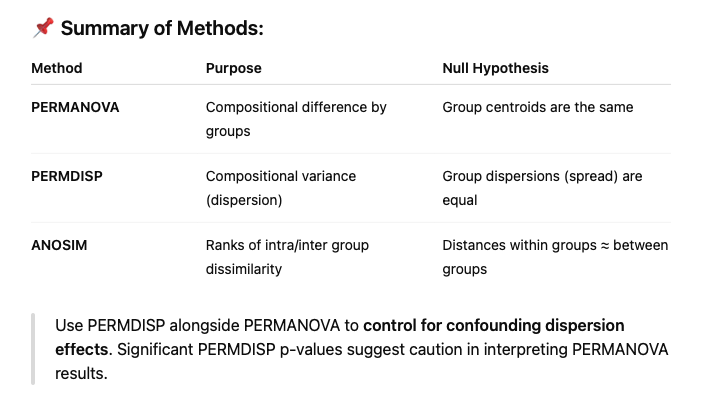

In [12]:
shipping_general_metadata_all_samples

Chao1 kmers  Chao1 OTUs  Chao1 ASVs  identifier row  \
366294_121-LP4-16S-0621   244.000000         1.0         1.0   W30.02.28   E   
366294_147-LP4-16S-0647   244.000000         1.0         1.0   W30.01.28   G   
366294_142-LP4-16S-0642   244.000000         2.0         1.0   W17.03.28   B   
366294_175-LP4-16S-0675   361.000000         5.0         2.0   W17.03.01   C   
366294_200-LP4-16S-0700   366.344828         1.0         2.0  W17.01.01    D   
...                              ...         ...         ...         ...  ..   
366294_211-LP4-16S-0711   728.000000         5.0         7.0  W30.01.01    G   
366294_132-LP4-16S-0632   728.000000         5.0         7.0   W04.01.28   H   
366294_224-LP4-16S-0724   728.000000         5.0         7.0   W17.03.14   D   
366294_186-LP4-16S-0686   734.000000         5.0        11.0   W17.02.05   F   
xxx                              NaN         NaN         NaN   W04.03.28   F   

                         column  temperature  day  replicate well  ...  \
366294_121-LP4-16S-0621       6           30   28          2  E06  ...   
366294_147-LP4-16S-0647       9           30   28          1  G09  ...   
366294_142-LP4-16S-0642       9           17   28          3  B09  ...   
366294_175-LP4-16S-0675       1           17    1          3  C01  ...   
366294_200-LP4-16S-0700       4           17    1          1  D04  ...   
...                         ...          ...  ...        ...  ...  ...   
366294_211-LP4-16S-0711       5           30    1          1  G05  ...   
366294_132-LP4-16S-0632       7            4   28          1  H07  ...   
366294_224-LP4-16S-0724       7           17   14          3  D07  ...   
366294_186-LP4-16S-0686       2           17    5          2  F02  ...   
xxx                           9            4   28          3  F09  ...   

                         Evenness ASVs  Simpson ASVs  Shannon OTUs  \
366294_121-LP4-16S-0621       0.000000      0.000000      0.000000   
366294_147-LP4-16S-0647       0.000000      0.000000      0.000000   
366294_142-LP4-16S-0642       0.000000      0.000000      0.995727   
366294_175-LP4-16S-0675       0.066634      0.015706      0.136859   
366294_200-LP4-16S-0700       0.027267      0.005464      0.000000   
...                                ...           ...           ...   
366294_211-LP4-16S-0711       0.323106      0.269474      0.611716   
366294_132-LP4-16S-0632       0.470056      0.444598      1.023748   
366294_224-LP4-16S-0724       0.519479      0.565799      1.441522   
366294_186-LP4-16S-0686       0.349573      0.420970      0.936512   
xxx                                NaN           NaN           NaN   

                         Evenness OTUs  Simpson OTUs  Shannon kmers  \
366294_121-LP4-16S-0621       0.000000      0.000000       7.918076   
366294_147-LP4-16S-0647       0.000000      0.000000       7.918076   
366294_142-LP4-16S-0642       0.995727      0.497041       7.918076   
366294_175-LP4-16S-0675       0.068430      0.031205       7.952775   
366294_200-LP4-16S-0700       0.000000      0.000000       7.926608   
...                                ...           ...            ...   
366294_211-LP4-16S-0711       0.263452      0.177119       8.411517   
366294_132-LP4-16S-0632       0.440904      0.353560       8.665579   
366294_224-LP4-16S-0724       0.620830      0.574820       9.019031   
366294_186-LP4-16S-0686       0.403334      0.393186       8.850571   
xxx                                NaN           NaN            NaN   

                         Evenness kmers  Simpson kmers    color   color2  
366294_121-LP4-16S-0621        0.998404       0.995840  #751c6d  #751c6d  
366294_147-LP4-16S-0647        0.998404       0.995840  #751c6d  #751c6d  
366294_142-LP4-16S-0642        0.998404       0.995840  #fdc067  #fdc067  
366294_175-LP4-16S-0675        0.936077       0.995825  #332615  #fdc067  
366294_200-LP4-16S-0700        0.932997       0.995792  #332615  #fdc067  
...                            

In [13]:
metadata = shipping_general_metadata_all_samples.copy()

In [16]:
from skbio.stats.distance import permanova, permdisp, anosim
import numpy as np
import pandas as pd
from skbio.stats.ordination import pcoa

results = []
dispersion_records = []
for name, dm in dms.items():
    ids = [str(i[0]) if isinstance(i, tuple) else str(i) for i in dm.ids]
    meta = metadata.loc[metadata.index.intersection(ids)].copy()

    # Ensure string dtypes
    meta['temperature'] = meta['temperature'].astype(str)
    meta['day'] = meta['day'].astype(str)
    meta['temp_day'] = meta['temperature'] + ":" + meta['day']

    try:
        # --- PERMANOVA ---
        res_temp = permanova(dm, meta, column='temperature')
        res_day = permanova(dm, meta, column='day')
        res_inter = permanova(dm, meta, column='temp_day')  # Not a true interaction term

        # --- PERMDISP ---
        disp_temp = permdisp(dm, meta, column='temperature')
        disp_day = permdisp(dm, meta, column='day')
        disp_inter = permdisp(dm, meta, column='temp_day')

        # --- ANOSIM ---
        anosim_temp = anosim(dm, meta, column='temperature')
        anosim_day = anosim(dm, meta, column='day')
        anosim_inter = anosim(dm, meta, column='temp_day')
        

        # Optional: store dispersion results separately
        

        # Compute group-wise dispersion (mean distance to centroid)
        for grouping_column in ['temperature', 'day', 'temp_day']:
            groups = meta[grouping_column].unique()

            for group in groups:
                group_ids = meta[meta[grouping_column] == group].index
                if len(group_ids) < 2:
                    continue  # Can't compute dispersion on single sample
                try:
                    group_dm = dm.filter(group_ids)
                    coords = pcoa(group_dm).samples
                    centroid = coords.mean(axis=0)
                    distances = np.sqrt(((coords - centroid) ** 2).sum(axis=1))
                    dispersion_records.append({
                        'Matrix': name,
                        'Grouping': grouping_column,
                        'Group': group,
                        'MeanDistanceToCentroid': distances.mean(),
                        'StdDistanceToCentroid': distances.std(),
                        'N_Samples': len(distances)
                    })
                except Exception as e:
                    dispersion_records.append({
                        'Matrix': name,
                        'Grouping': grouping_column,
                        'Group': group,
                        'Error': str(e)
                    })

                results.append({
            'Matrix': name,
            # PERMANOVA
            'PERMANOVA R2 temperature': res_temp['test statistic'],
            'PERMANOVA p temperature': res_temp['p-value'],
            'PERMANOVA R2 day': res_day['test statistic'],
            'PERMANOVA p day': res_day['p-value'],
            'PERMANOVA R2 temp:day': res_inter['test statistic'],
            'PERMANOVA p temp:day': res_inter['p-value'],
            'PERMANOVA residual': 1 - (res_temp['test statistic'] + res_day['test statistic'] + res_inter['test statistic']),
            # PERMDISP
            'PERMDISP F temperature': disp_temp['test statistic'],
            'PERMDISP p temperature': disp_temp['p-value'],
            'PERMDISP F day': disp_day['test statistic'],
            'PERMDISP p day': disp_day['p-value'],
            'PERMDISP F temp:day': disp_inter['test statistic'],
            'PERMDISP p temp:day': disp_inter['p-value'],
            # ANOSIM
            'ANOSIM R temperature': anosim_temp['test statistic'],
            'ANOSIM p temperature': anosim_temp['p-value'],
            'ANOSIM R day': anosim_day['test statistic'],
            'ANOSIM p day': anosim_day['p-value'],
            'ANOSIM R temp:day': anosim_inter['test statistic'],
            'ANOSIM p temp:day': anosim_inter['p-value'],
        })


    except Exception as e:
        results.append({
            'Matrix': name,
            'PERMANOVA R2 temperature': np.nan,
            'PERMANOVA p temperature': np.nan,
            'PERMANOVA R2 day': np.nan,
            'PERMANOVA p day': np.nan,
            'PERMANOVA R2 temp:day': np.nan,
            'PERMANOVA p temp:day': np.nan,
            'PERMANOVA residual': np.nan,
            'PERMDISP F temperature': np.nan,
            'PERMDISP p temperature': np.nan,
            'PERMDISP F day': np.nan,
            'PERMDISP p day': np.nan,
            'PERMDISP F temp:day': np.nan,
            'PERMDISP p temp:day': np.nan,
            'ANOSIM R temperature': np.nan,
            'ANOSIM p temperature': np.nan,
            'ANOSIM R day': np.nan,
            'ANOSIM p day': np.nan,
            'ANOSIM R temp:day': np.nan,
            'ANOSIM p temp:day': np.nan,
            'Error': str(e)
        })

# Save
df = pd.DataFrame(results)
df.to_csv("Stats/20250601_PERMANOVA_ANOSIM_PERMDISP_results_beta_div_16S.csv", index=False)
# Save PERMDISP test statistic per group
dispersion_df = pd.DataFrame(dispersion_records)
dispersion_df.to_csv("Stats/20250601_PERMDISP_centroid_distances_per_group.csv", index=False)


# Preview
cols_to_show = [c for c in df.columns if 'Matrix' in c or 'PERMANOVA' in c or 'PERMDISP' in c or 'ANOSIM' in c]
print(df[cols_to_show].head())


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.35570205664356175 and the largest is 2.0368022554184453.
  warn(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be usefu

               Matrix  PERMANOVA R2 temperature  PERMANOVA p temperature  \
0  jaccard_dm_16S_ASV                  2.607104                    0.023   
1  jaccard_dm_16S_ASV                  2.607104                    0.023   
2  jaccard_dm_16S_ASV                  2.607104                    0.023   
3  jaccard_dm_16S_ASV                  2.607104                    0.023   
4  jaccard_dm_16S_ASV                  2.607104                    0.023   

   PERMANOVA R2 day  PERMANOVA p day  PERMANOVA R2 temp:day  \
0          1.044086             0.39               1.369034   
1          1.044086             0.39               1.369034   
2          1.044086             0.39               1.369034   
3          1.044086             0.39               1.369034   
4          1.044086             0.39               1.369034   

   PERMANOVA p temp:day  PERMANOVA residual  PERMDISP F temperature  \
0                 0.038           -4.020223                4.649734   
1                 0.03

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.07309526864454459 and the largest is 2.9064897388658917.
  warn(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be usefu

In [15]:
df.to_csv("Stats/20250601_PERMANOVA_ANOSIM_PERMDISP_results_beta_div_16S.csv", index=False)
# Save PERMDISP test statistic per group

dispersion_df.to_csv("Stats/20250601_PERMDISP_centroid_distances_per_group.csv", index=False)

In [74]:
from skbio.stats.distance import permanova
import pandas as pd
import numpy as np

def nested_permanova(dm, metadata, group_col_1, group_col_2):
    """
    Approximate nested PERMANOVA: group_col_1 + group_col_2(group_col_1)
    Parameters
    ----------
    dm : DistanceMatrix
    metadata : pd.DataFrame (indexed by sample IDs)
    group_col_1 : str (e.g. 'temperature')
    group_col_2 : str (e.g. 'day')
    
    Returns
    -------
    pd.DataFrame with test results
    """
    ids = [str(i[0]) if isinstance(i, tuple) else str(i) for i in dm.ids]
    meta = metadata.loc[metadata.index.intersection(ids)].copy()

    meta[group_col_1] = meta[group_col_1].astype(str)
    meta[group_col_2] = meta[group_col_2].astype(str)

    # First level PERMANOVA (e.g. temperature)
    res1 = permanova(dm, meta, column=group_col_1)

    # Second level PERMANOVA (e.g. day), stratified by group_col_1
    nested_stats = []
    for group_val, sub_meta in meta.groupby(group_col_1):
        sub_ids = sub_meta.index.tolist()
        if len(sub_ids) < 3 or sub_meta[group_col_2].nunique() < 2:
            continue  # Not enough data
        sub_dm = dm.filter(sub_ids)
        try:
            res2 = permanova(sub_dm, sub_meta, column=group_col_2)
            nested_stats.append({
                f'{group_col_1}': group_val,
                f'PERMANOVA R2 {group_col_2}({group_col_1})': res2['test statistic'],
                f'p {group_col_2}({group_col_1})': res2['p-value']
            })
        except Exception as e:
            nested_stats.append({
                f'{group_col_1}': group_val,
                f'PERMANOVA R2 {group_col_2}({group_col_1})': np.nan,
                f'p {group_col_2}({group_col_1})': np.nan,
                'Error': str(e)
            })

    # Combine
    nested_df = pd.DataFrame(nested_stats)
    result = {
        'PERMANOVA R2 ' + group_col_1: res1['test statistic'],
        'PERMANOVA p ' + group_col_1: res1['p-value'],
        'nested_details': nested_df
    }
    return result


nested temperature(day)

In [75]:
all_nested_results = []

for name, dm in dms.items():
    result = nested_permanova(dm, metadata, group_col_1='temperature', group_col_2='day')
    
    flat = {
        'Matrix': name,
        'R2 temperature': result['PERMANOVA R2 temperature'],
        'p temperature': result['PERMANOVA p temperature']
    }

    # Add nested results by aggregating
    nested_df = result['nested_details']
    if not nested_df.empty:
        flat['Mean R2 day(temperature)'] = nested_df.filter(like='R2').mean().values[0]
        flat['Mean p day(temperature)'] = nested_df.filter(like='p ').mean().values[0]
    else:
        flat['Mean R2 day(temperature)'] = np.nan
        flat['Mean p day(temperature)'] = np.nan

    all_nested_results.append(flat)

# Final DataFrame
nested_results_df = pd.DataFrame(all_nested_results)
nested_results_df.to_csv("Stats/20250514_nested_permanova_temperature_day_beta_16S.csv", index=False)
print(nested_results_df.head())


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/distance/_permanova.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  return (s_A / (num_groups - 1)) / (s_W / (sample_size - num_groups))


                      Matrix  R2 temperature  p temperature  \
0         jaccard_dm_16S_ASV        2.607104          0.029   
1  jaccard_dm_16S_ASV_merged        1.560377          0.161   
2           bray_dm_16S_ASV        17.202074          0.001   
3     bray_dm_16S_ASV_merged       10.697273          0.001   
4         jaccard_dm_16S_OTU        2.522308          0.052   

   Mean R2 day(temperature)  Mean p day(temperature)  
0                  1.327519                 0.544000  
1                  1.441767                 0.273333  
2                  4.205839                 0.006667  
3                  1.987768                 0.036333  
4                  1.313334                 0.471333  


In [80]:
all_nested_results = []
all_nested_per_temp = []

for name, dm in dms.items():
    result = nested_permanova(dm, metadata, group_col_1='temperature', group_col_2='day')
    
    flat = {
        'Matrix': name,
        'R2 temperature': result['PERMANOVA R2 temperature'],
        'p temperature': result['PERMANOVA p temperature']
    }

    # Extract nested result details
    nested_df = result['nested_details']
    nested_df['Matrix'] = name  # add matrix label
    all_nested_per_temp.append(nested_df)

    # Instead of mean, you could later use median or report min/max separately
    if not nested_df.empty:
        flat['Mean R2 day(temperature)'] = nested_df.filter(like='R2').mean().values[0]
        flat['Mean p day(temperature)'] = nested_df.filter(like='p ').mean().values[0]
    else:
        flat['Mean R2 day(temperature)'] = np.nan
        flat['Mean p day(temperature)'] = np.nan

    all_nested_results.append(flat)

# Save summary table (same as before)
nested_results_df = pd.DataFrame(all_nested_results)
nested_results_df.to_csv("Stats/20250514_nested_permanova_temperature_day_beta_16S_summary.csv", index=False)

# Save full nested results per temperature group
nested_per_temp_df = pd.concat(all_nested_per_temp, ignore_index=True)
nested_per_temp_df.to_csv("Stats/20250514_nested_permanova_per_temperature_beta_16S.csv", index=False)

print("✅ Saved both summary and per-temperature nested PERMANOVA tables.")


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/distance/_permanova.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  return (s_A / (num_groups - 1)) / (s_W / (sample_size - num_groups))


✅ Saved both summary and per-temperature nested PERMANOVA tables.


1. Which distance metric is more sensitive?

Bray–Curtis metrics consistently show higher R² values for temperature and day, and lower p-values.
In contrast, Jaccard and k-mer Jaccard matrices yield much lower R²s and non-significant p-values.
🧠 Conclusion: Bray–Curtis is more sensitive and better reflects community shifts in your data.
2. Temperature vs. Day effects

E.g., in bray_dm_16S_ASV:
Temperature: R² = 17.2, p = 0.001 (strong global effect)
Day (within temp): Mean R² = 4.2, p = 0.0067 (moderate and significant)
✅ Temperature explains more variation, but day has a clear effect within each temperature.
3. Merged vs. unmerged data

Merged data (e.g., bray_dm_16S_ASV_merged) consistently show lower R²s, possibly due to loss of within-replicate variance.
✅ Use unmerged distance matrices if the goal is to analyze within-treatment structure or subtle differences.
4. Significant nested structure

Many Mean p day(temperature) values for Bray–Curtis are < 0.05 (especially for unmerged).
✅ Your nested approach is capturing intra-temperature temporal shifts, which would be missed in a flat model.




Using a nested PERMANOVA approach, we found that temperature explained the largest proportion of variance in beta diversity (R² = 16–18%, p < 0.001, Bray–Curtis). Temporal dynamics (days) nested within temperature also showed significant structure (mean nested R² = 4.2%, p < 0.01), suggesting that while temperature is the primary driver, community succession within each temperature condition is non-random.

nested day(temperature)

In [76]:
all_nested_results = []

for name, dm in dms.items():
    result = nested_permanova(dm, metadata, group_col_1='day', group_col_2='temperature')
    
    flat = {
        'Matrix': name,
        'R2 day': result['PERMANOVA R2 day'],
        'p day': result['PERMANOVA p day']
    }

    # Add nested results by aggregating
    nested_df = result['nested_details']
    if not nested_df.empty:
        flat['Mean R2 temperature(day)'] = nested_df.filter(like='R2').mean().values[0]
        flat['Mean p temperature(day)'] = nested_df.filter(like='p ').mean().values[0]
    else:
        flat['Mean R2 temperature(day)'] = np.nan
        flat['Mean p temperature(day)'] = np.nan

    all_nested_results.append(flat)

# Final DataFrame
nested_results_df = pd.DataFrame(all_nested_results)
nested_results_df.to_csv("Stats/20250514_nested_permanova_day_temperature_beta_16S.csv", index=False)
print(nested_results_df.head())

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/distance/_permanova.py:129: RuntimeWarning: invalid value encountered in scalar divide
  return (s_A / (num_groups - 1)) / (s_W / (sample_size - num_groups))
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/distance/_permanova.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  return (s_A / (num_groups - 1)) / (s_W / (sample_size - num_groups))
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/distance/_permanova.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  return (s_A / (num_groups - 1)) / (s_W / (sample_size - num_groups))


                      Matrix  R2 temperature  p temperature  \
0         jaccard_dm_16S_ASV        1.044086          0.426   
1  jaccard_dm_16S_ASV_merged        1.462304          0.077   
2           bray_dm_16S_ASV         2.658577          0.003   
3     bray_dm_16S_ASV_merged        2.445554          0.001   
4         jaccard_dm_16S_OTU        1.366457          0.148   

   Mean R2 temperature(day)  Mean p temperature(day)  
0                  1.774813                 0.402818  
1                  1.463525                 0.478818  
2                 10.640378                 0.052182  
3                  7.248469                 0.101455  
4                  1.505762                 0.475364  


In [81]:
# Output list for summary + separate files for detailed per-day results
summary_results = []
per_day_results_all = []

for name, dm in dms.items():
    result = nested_permanova(dm, metadata, group_col_1='day', group_col_2='temperature')

    flat = {
        'Matrix': name,
        'R2 day': result['PERMANOVA R2 day'],
        'p day': result['PERMANOVA p day']
    }

    nested_df = result['nested_details']
    nested_df['Matrix'] = name  # Add matrix name to per-day results

    if not nested_df.empty:
        flat['Mean R2 temperature(day)'] = nested_df.filter(like='R2').mean().values[0]
        flat['Mean p temperature(day)'] = nested_df.filter(like='p ').mean().values[0]
        per_day_results_all.append(nested_df)  # Collect per-day details
    else:
        flat['Mean R2 temperature(day)'] = np.nan
        flat['Mean p temperature(day)'] = np.nan

    summary_results.append(flat)

# Save summary table
summary_df = pd.DataFrame(summary_results)
summary_df.to_csv("Stats/20250514_nested_permanova_day_temperature_beta_16S.csv", index=False)

# Save combined per-day detailed table
if per_day_results_all:
    per_day_df = pd.concat(per_day_results_all, ignore_index=True)
    per_day_df.to_csv("Stats/20250514_nested_permanova_per_day_temperature_beta_16S.csv", index=False)


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/distance/_permanova.py:129: RuntimeWarning: invalid value encountered in scalar divide
  return (s_A / (num_groups - 1)) / (s_W / (sample_size - num_groups))
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/distance/_permanova.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  return (s_A / (num_groups - 1)) / (s_W / (sample_size - num_groups))
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/distance/_permanova.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  return (s_A / (num_groups - 1)) / (s_W / (sample_size - num_groups))


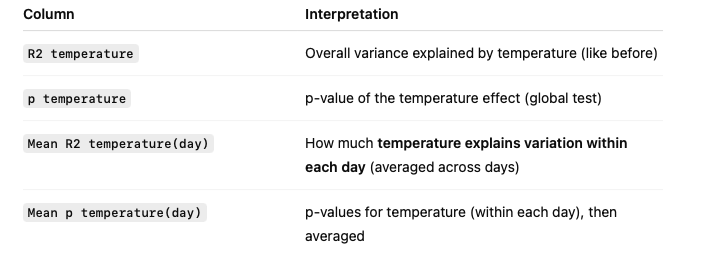

✅ Temperature is highly significant across Bray–Curtis matrices

E.g.:
bray_dm_16S_ASV: R² = 2.66, p = 0.003, nested R² = 10.64, p = 0.05
bray_dm_16S_k: R² = 2.88, p = 0.001, nested R² = 11.8, p = 0.06
➡️ This means within each day, temperature still explains a large amount of variation — often even more than in the "day nested in temperature" model. That’s strong evidence that temperature has a robust effect across all time points.

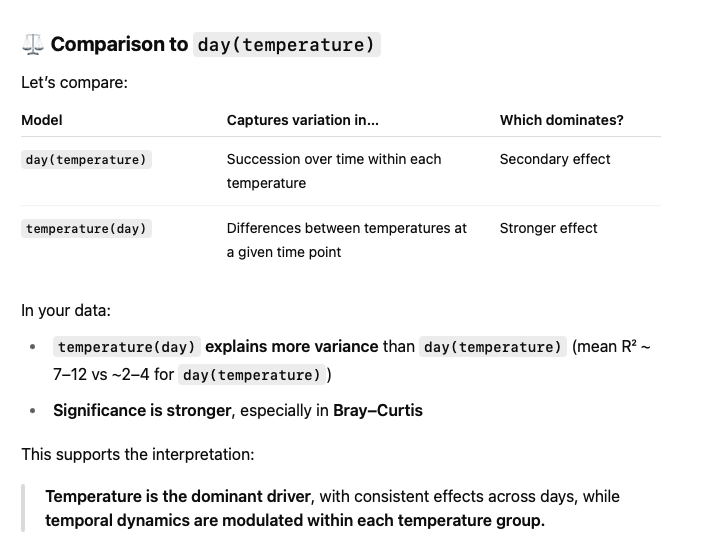

Nested PERMANOVA models showed that temperature consistently explained more variance in microbial community structure than time (day). Across all Bray–Curtis-based matrices, temperature nested within day yielded higher R² values (mean 10.6–12.3%) than the inverse (day nested within temperature: 2–4%), underscoring the dominant role of environmental conditions over temporal succession.

### visuals for nested effects

In [126]:
#import and merge the two outputs:
nested_results_df = pd.read_csv("Stats/20250514_nested_permanova_temperature_day_beta_16S.csv")
nested_results_df_2 = pd.read_csv("Stats/20250514_nested_permanova_day_temperature_beta_16S.csv")

#merge them:
nested_results_df = pd.merge(nested_results_df, nested_results_df_2, on='Matrix')

nested_results_df




Matrix  R2 temperature  p temperature  \
0          jaccard_dm_16S_ASV        2.607104          0.029   
1   jaccard_dm_16S_ASV_merged        1.560377          0.161   
2             bray_dm_16S_ASV       17.202074          0.001   
3      bray_dm_16S_ASV_merged       10.697273          0.001   
4          jaccard_dm_16S_OTU        2.522308          0.052   
5   jaccard_dm_16S_OTU_merged        1.295019          0.220   
6             bray_dm_16S_OTU       18.219587          0.001   
7      bray_dm_16S_OTU_merged       11.227577          0.001   
8            jaccard_dm_16S_k        0.931448          0.392   
9     jaccard_dm_16S_k_merged        0.942197          0.325   
10              bray_dm_16S_k       16.270697          0.001   
11       bray_dm_16S_k_merged        9.651913          0.001   
12          jaccard_dm_16S_kt        0.931448          0.386   
13   jaccard_dm_16S_kt_merged        0.942197          0.353   
14             bray_dm_16S_kt       16.270697          0.001   
15      bray_dm_16S_kt_merged        9.651913          0.001   

    Mean R2 day(temperature)  Mean p day(temperature)    R2 day  p day  \
0                   1.327519                 0.544000  1.044086  0.393   
1                   1.441767                 0.273333  1.462304  0.068   
2                   4.205839                 0.006667  2.658577  0.006   
3                   1.987768                 0.036333  2.445554  0.002   
4                   1.313334                 0.471333  1.366457  0.149   
5                   1.734813                 0.245333  1.464027  0.104   
6                   4.044706                 0.006000  2.516997  0.005   
7                   1.903530                 0.044333  2.301186  0.004   
8                   2.421068                 0.474333  1.276189  0.207   
9                   2.067221                 0.270000  2.419583  0.014   
10                  4.203324                 0.007000  2.883774  0.002   
11                  1.972781                 0.077667  2.582140  0.002   
12                  2.421068                 0.481000  1.276189  0.218   
13                  2.067221                 0.266333  2.419583  0.022   
14                  4.203324                 0.003667  2.883774  0.004   
15                  1.972781                 0.076667  2.582140  0.001   

    Mean R2 temperature(day)  Mean p temperature(day)  
0                   1.774813                 0.401727  
1                   1.463525                 0.478727  
2                  10.640378                 0.050545  
3                   7.248469                 0.099727  
4                   1.505762                 0.486545  
5                   1.536679                 0.519455  
6                  12.277715                 0.059818  
7                   7.004198                 0.109455  
8                   1.517102                 0.455727  
9                   1.344141                 0.580182  
10                 11.814756                 0.064545  
11                  7.265655                 0.122455  
12                  1.517102                 0.462091  
13                  1.344141                 0.591455  
14                 11.814756                 0.063545  
15                  7.265655                 0.122364

In [124]:
nested_results_df['Matrix'].unique()

array(['jaccard_dm_16S_ASV', 'jaccard_dm_16S_ASV_merged',
       'bray_dm_16S_ASV_merged', 'jaccard_dm_16S_OTU',
       'jaccard_dm_16S_OTU_merged', 'bray_dm_16S_OTU',
       'bray_dm_16S_OTU_merged', 'jaccard_dm_16S_k',
       'jaccard_dm_16S_k_merged', 'bray_dm_16S_k', 'bray_dm_16S_k_merged',
       'jaccard_dm_16S_kt', 'jaccard_dm_16S_kt_merged', 'bray_dm_16S_kt',
       'bray_dm_16S_kt_merged'], dtype=object)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


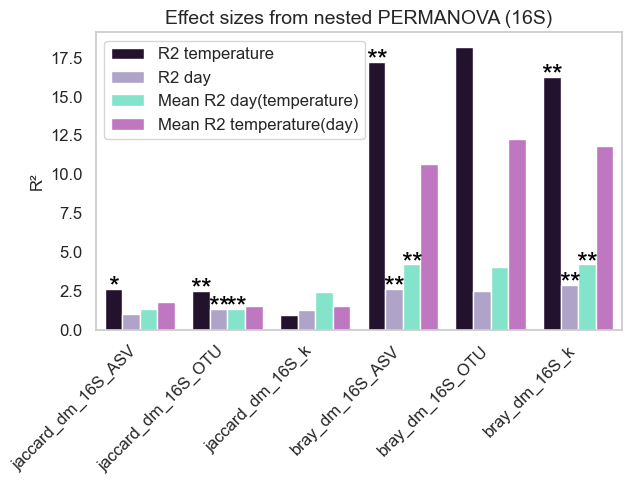

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distance metrics to include
selected_matrices = [
    'jaccard_dm_16S_ASV',
    'jaccard_dm_16S_OTU',
    'jaccard_dm_16S_k',
    'bray_dm_16S_ASV',
    'bray_dm_16S_OTU',
    'bray_dm_16S_k'
    
]

# Filter data
df = nested_results_df.copy()
df = df[df['Matrix'].isin(selected_matrices)]

# Melt to long format
melted = pd.melt(
    df,
    id_vars=['Matrix'],
    value_vars=[
        'R2 temperature',
        'R2 day',
        'Mean R2 day(temperature)',
        'Mean R2 temperature(day)'
    ],
    var_name='Factor',
    value_name='R2'
)

# Map to p-values
pval_map = {
    'R2 temperature': 'p temperature',
    'R2 day': 'p day',
    'Mean R2 day(temperature)': 'Mean p day(temperature)',
    'Mean R2 temperature(day)': 'Mean p temperature(day)'
}

def get_significance(row):
    p = df.loc[df['Matrix'] == row['Matrix'], pval_map[row['Factor']]].values[0]
    if pd.isna(p):
        return ''
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

melted['Significance'] = melted.apply(get_significance, axis=1)
melted['Matrix'] = pd.Categorical(melted['Matrix'], categories=selected_matrices, ordered=True)

# Set color palette
palette = {
    'R2 temperature': '#240E31FF',  # Blue
    'R2 day': '#AC9ECEFF',  # Red
    'Mean R2 day(temperature)': '#74F3D3FF',  # Orange
    'Mean R2 temperature(day)': '#CB6BCEFF'  # Green
}

# Plot with bar handle
plt.figure(figsize=(6.5, 5))
ax = sns.barplot(data=melted, x='Matrix', y='R2', hue='Factor', palette=palette)

# Correctly place stars
for bar, (_, row) in zip(ax.patches, melted.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(
            x, height -0.8,
            row['Significance'],
            ha='center', va='bottom',
            fontsize=20, color='black'
        )

# Final formatting
plt.title("Effect sizes from nested PERMANOVA (16S)", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250514_nested_permanova_effect_sizes_16S.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [117]:
print(melted[melted['Matrix'] == 'bray_dm_16S_ASV'])

Empty DataFrame
Columns: [Matrix, Factor, R2, Significance]
Index: []


and visualize per day/ per temperature

In [101]:
selected_matrices1 = [
 'jaccard_dm_16S_ASV',
 'jaccard_dm_16S_OTU',
 'jaccard_dm_16S_k',
 'bray_dm_16S_ASV',
 'bray_dm_16S_OTU',
 'bray_dm_16S_k'
]

In [99]:
selected_matrices

['jaccard_dm_16S_ASV',
 'jaccard_dm_16S_OTU',
 'jaccard_dm_16S_k',
 'bray_dm_16S_ASV',
 'bray_dm_16S_OTU',
 'bray_dm_16S_k']

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


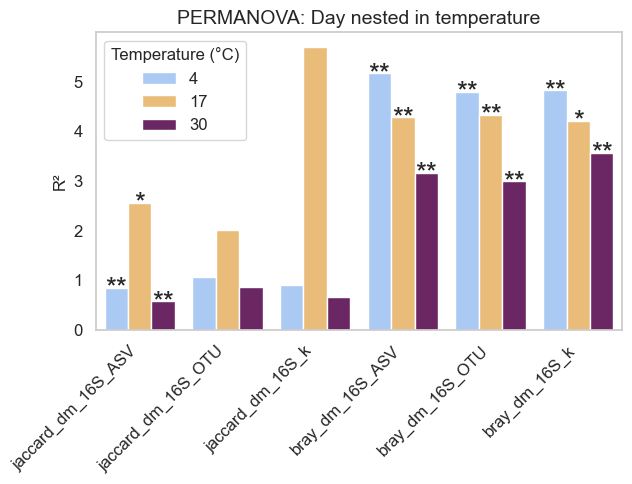

In [155]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250514_nested_permanova_per_temperature_beta_16S.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices1)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'temperature'],
    value_vars=['PERMANOVA R2 day(temperature)', 'p day(temperature)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'temperature', 'R2']], p_df[['Matrix', 'temperature', 'p_value']], on=['Matrix', 'temperature'])
base_colors = {
    '4': '#9EC8FFFF',
    '17': '#FDC067FF',
    '30': '#751C6DFF'
}

# base_colors = {
#     '#FDC067FF',
#     '#9EC8FFFF',
    
#     '#751C6DFF'
# }

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)



# Plot per temperature
plt.figure(figsize=(6.5, 5))
plot_df['temperature'] = pd.Categorical(
    plot_df['temperature'].astype(str),
    categories=['4', '17', '30'],
    ordered=True
)
plot_df['Matrix'] = plot_df['Matrix'].astype(str).str.strip()
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices1, ordered=True)



ax = sns.barplot(
    data=plot_df,
    x='Matrix',
    y='R2',
    hue='temperature',
    palette=base_colors
)



# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.3 , row['Significance'], ha='center', va='bottom', fontsize=20)

plt.title("PERMANOVA: Day nested in temperature", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Temperature (°C)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250514_nested_permanova_effect_sizes_per_temperature_16S.pdf", format='pdf', bbox_inches='tight')
plt.show()


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


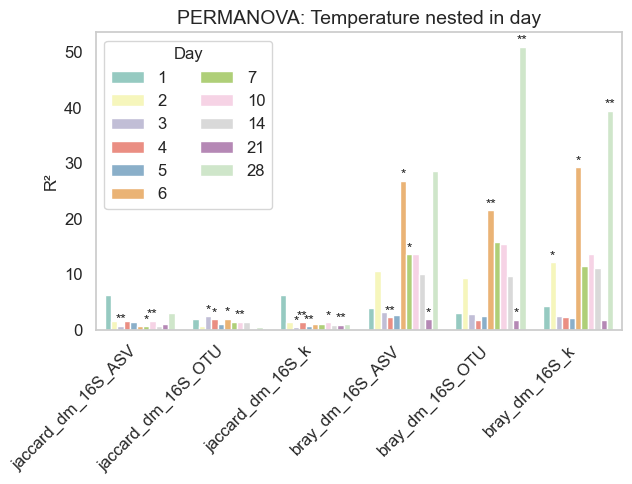

In [174]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250514_nested_permanova_per_day_temperature_beta_16S.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'day'],
    value_vars=['PERMANOVA R2 temperature(day)', 'p temperature(day)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'day', 'R2']], p_df[['Matrix', 'day', 'p_value']], on=['Matrix', 'day'])

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices1, ordered=True)

# Set color palette with 11 different colors:
palette = sns.color_palette("Set3", 11) 


# Plot per temperature
plt.figure(figsize=(6.5, 5))
ax = sns.barplot(data=plot_df, x='Matrix', y='R2', hue='day', palette=palette)

# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.1, row['Significance'], ha='center', va='bottom', fontsize=10)

plt.title("PERMANOVA: Temperature nested in day", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Day', fontsize=12, ncol=2)
plt.xlabel("", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250514_nested_permanova_effect_sizes_per_day_16S.pdf", format='pdf', bbox_inches='tight')
plt.show()